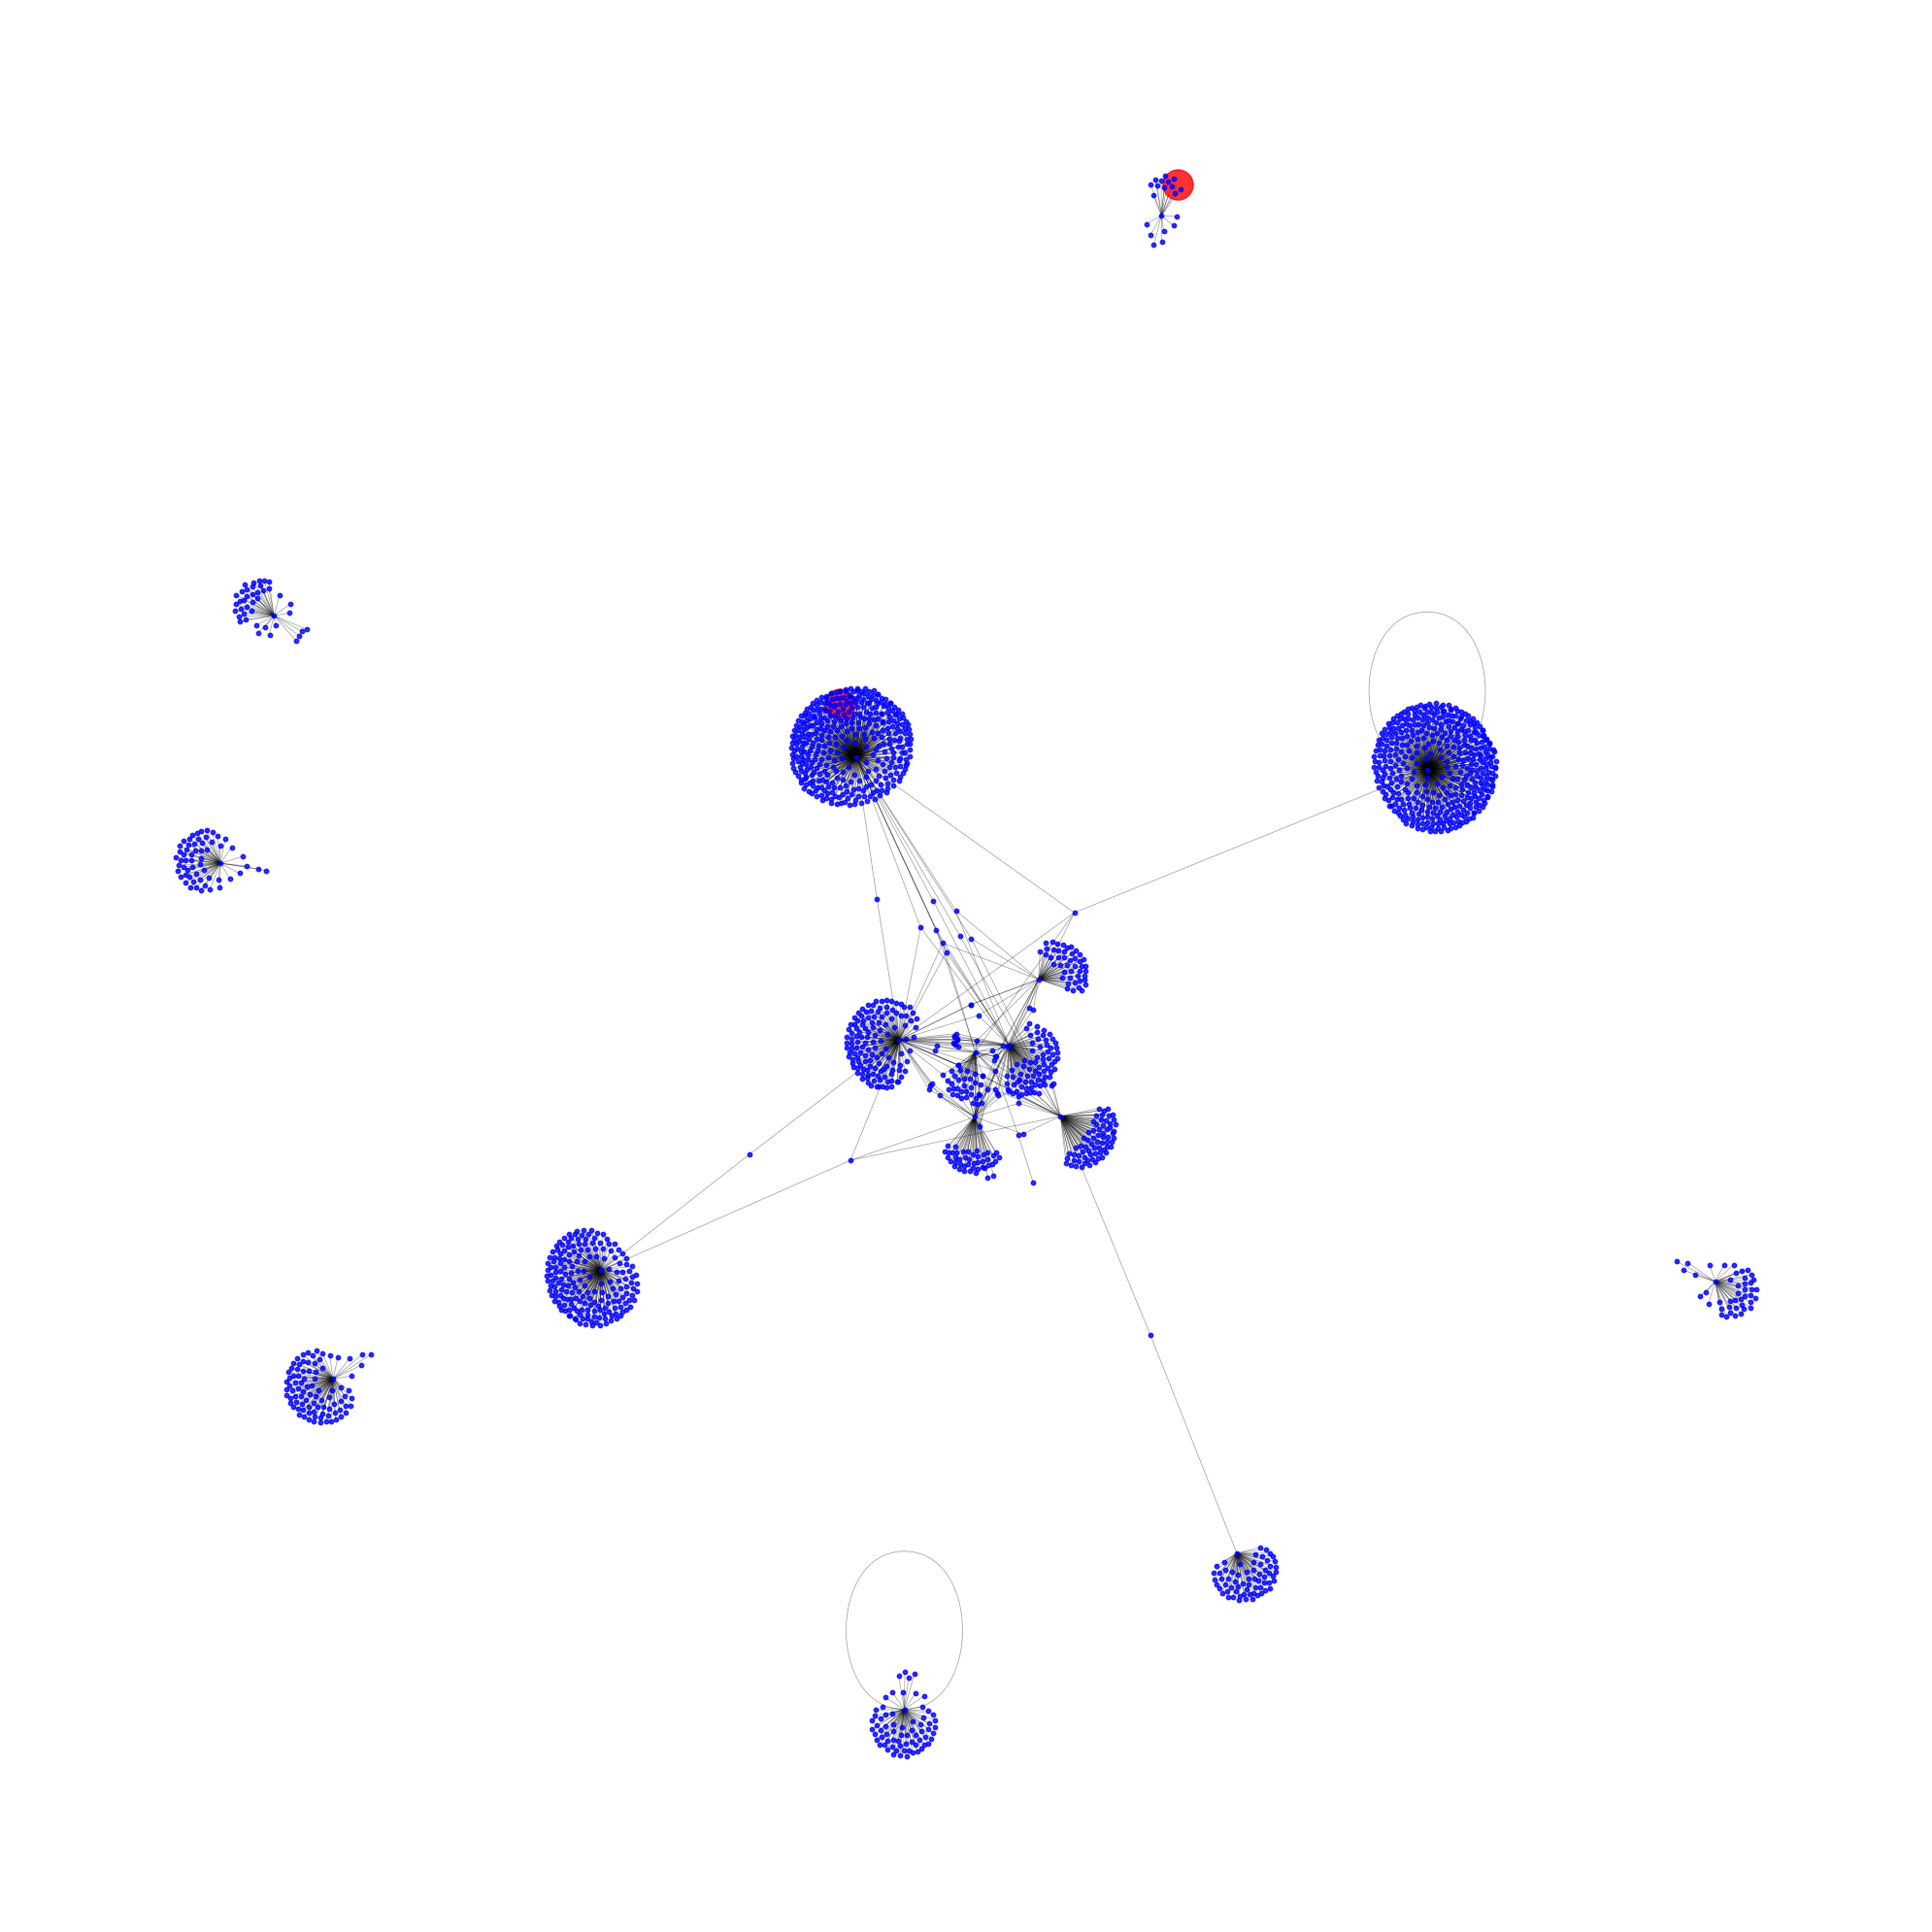

In [8]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            for uploader in uploaders:
                graph.add_edge(user_id, uploader)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=500, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='b', node_size=10, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.4)  # エッジの透明度を上げる
    # nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)

draw_bipartite_graph(bipartite_graph)

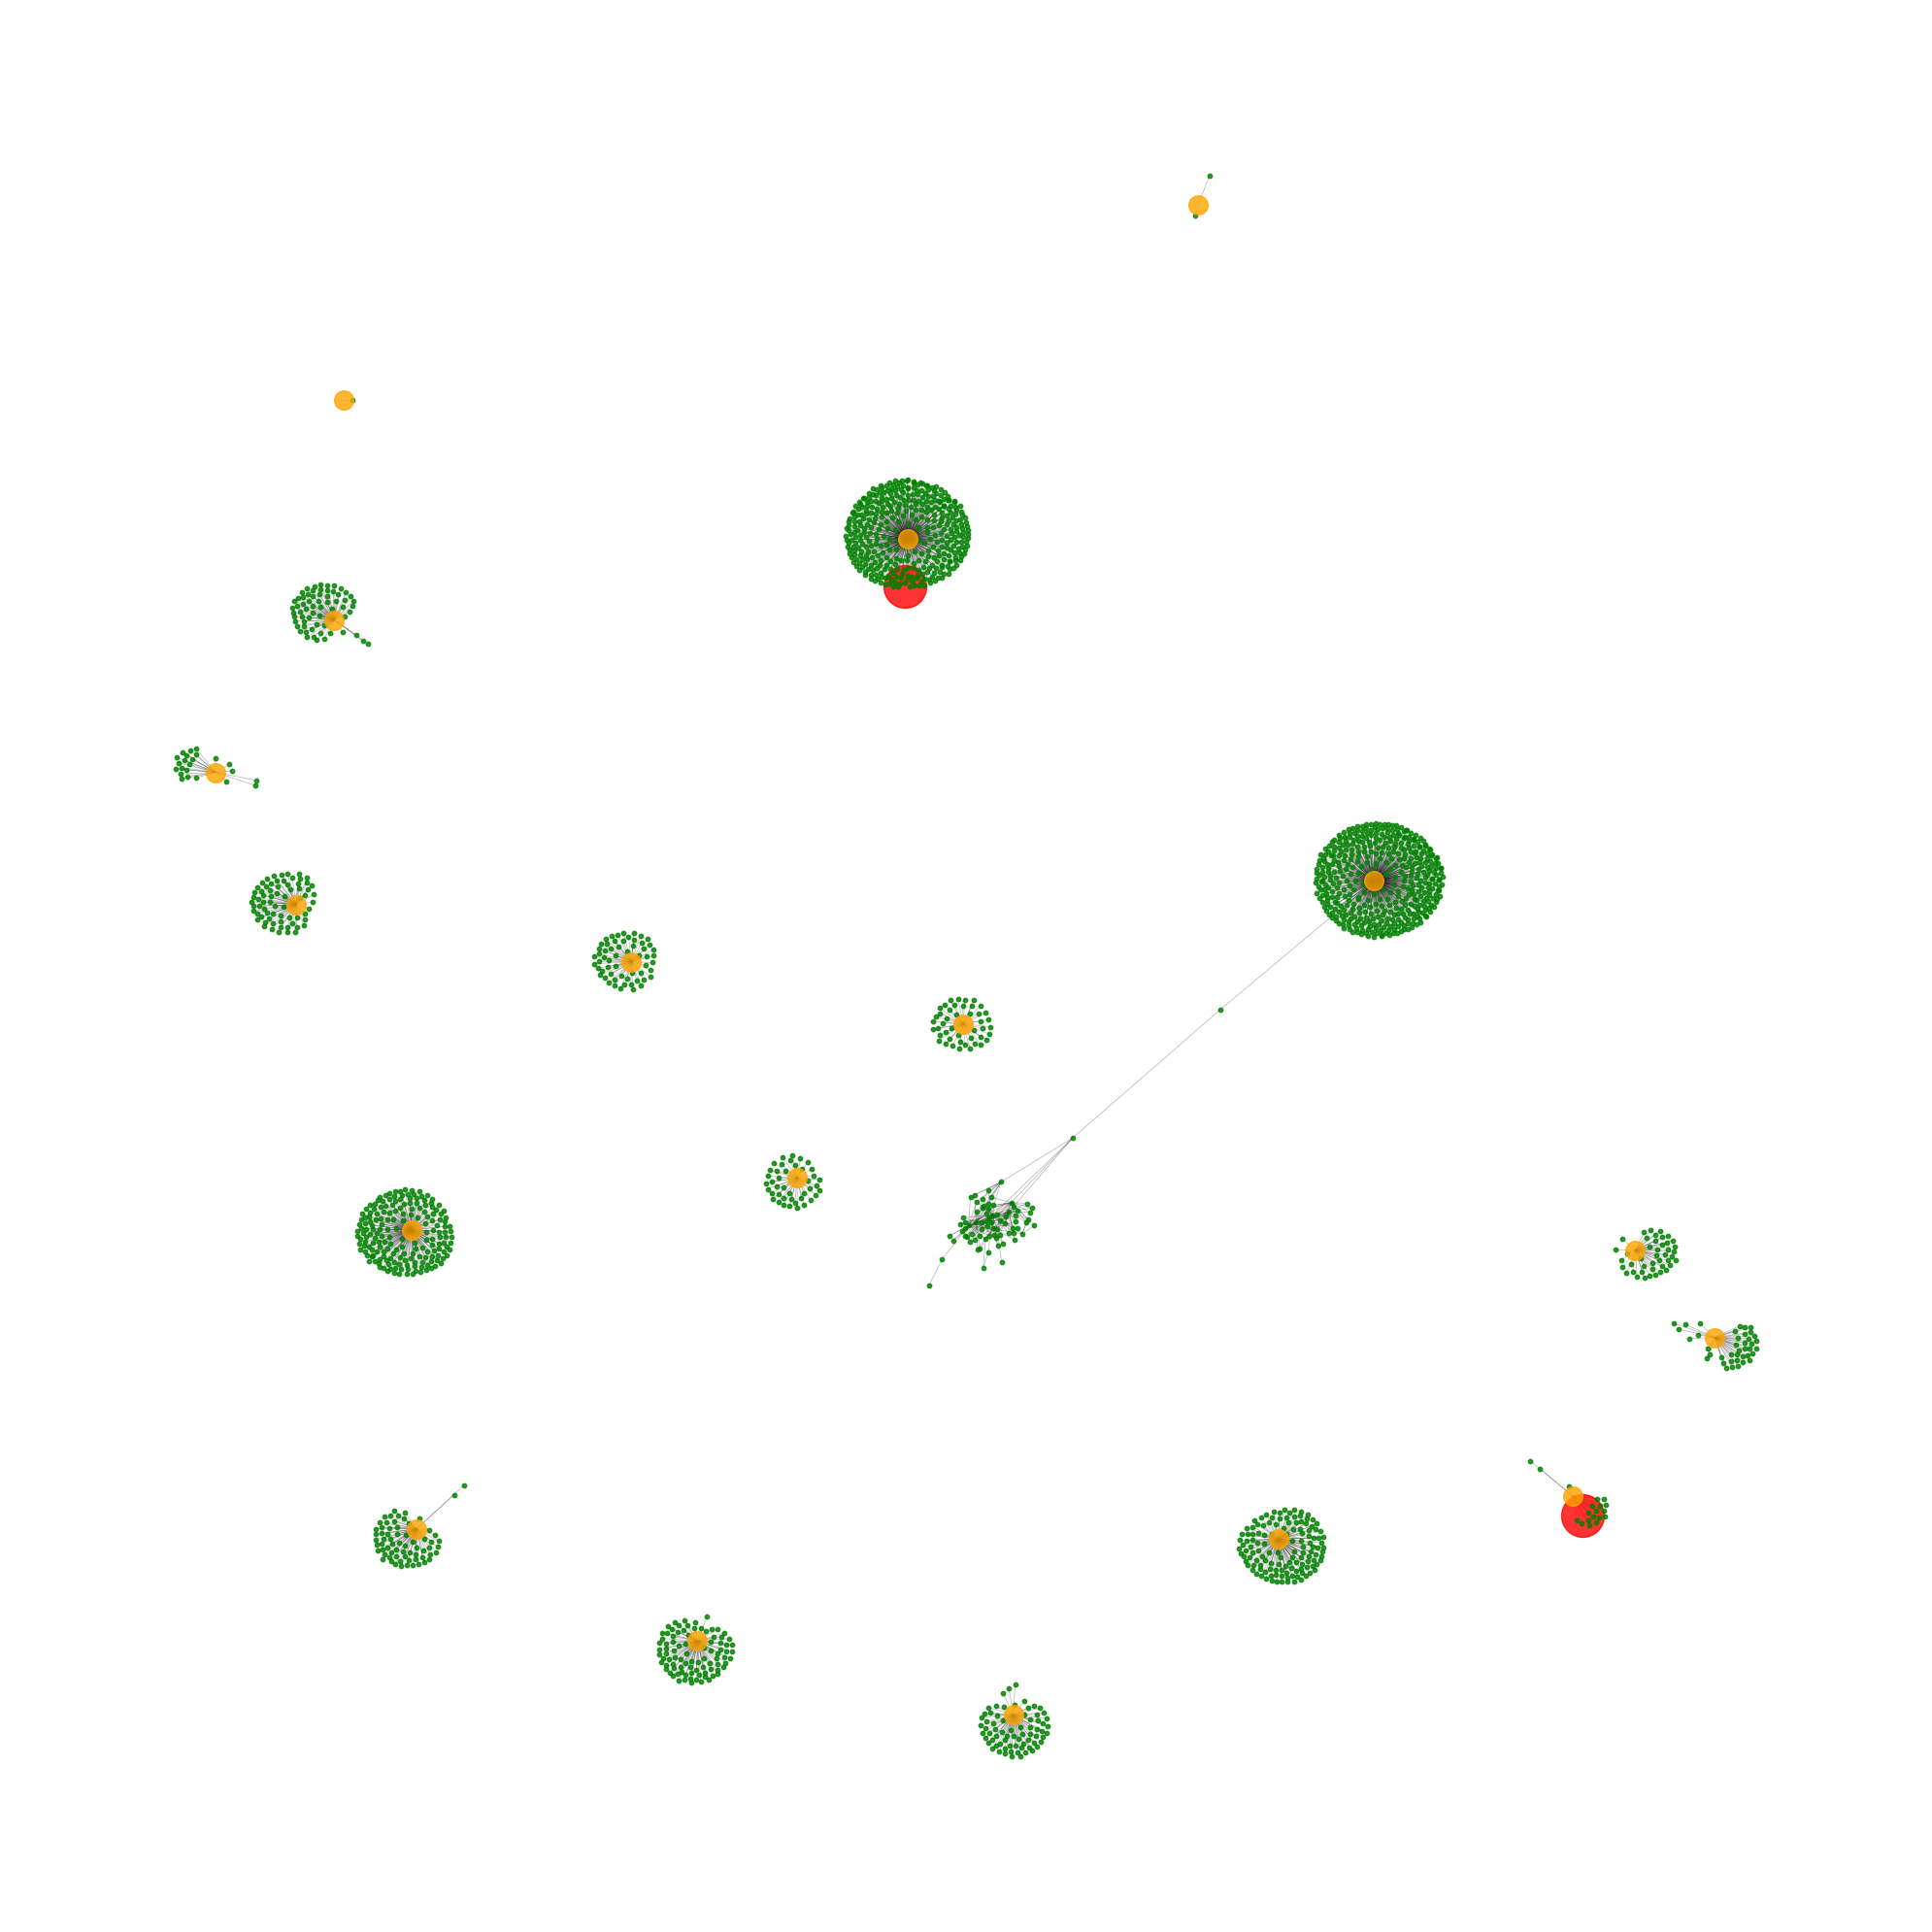

In [6]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    single_uploaders = defaultdict(list)
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            if len(uploaders) == 1:
                single_uploaders[uploaders[0]].append(user_id)
            else:
                for uploader in uploaders:
                    graph.add_edge(user_id, uploader)
    
    for uploader, users in single_uploaders.items():
        group_node = f"Group_{uploader}"
        for user in users:
            graph.add_edge(user, group_node)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ') and not n.startswith('Group_')]
    group_nodes = [n for n in G.nodes() if n.startswith('Group_')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='g', node_size=10, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=group_nodes, node_color='orange', node_size=200, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)  # エッジの透明度を上げる
    #nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)
draw_bipartite_graph(bipartite_graph)

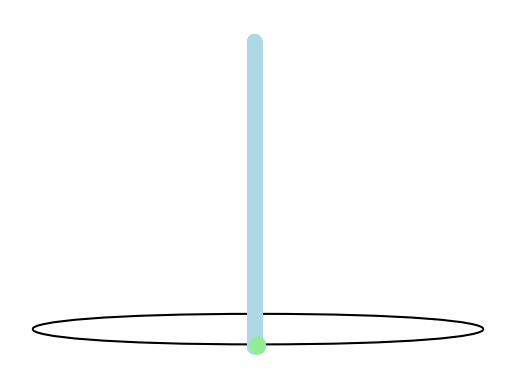

In [15]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(user_ids))
pos.update((n, (2, i)) for i, n in enumerate(uploaders))
nx.draw_networkx(G, pos, node_color=color_map, with_labels=False, node_size=100)

plt.axis('off')
plt.show()

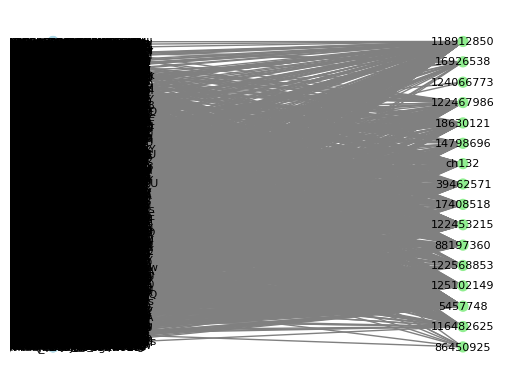

In [20]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()

{'16926538': 20, '5457748': 374, '88197360': 64, '116482625': 58, '17408518': 23, '122467986': 45, '86450925': 2, '122453215': 184, 'ch132': 89, '124066773': 1, '14798696': 43, '15378227': 69, '122568853': 40, '90869956': 421, '118912850': 129, '125102149': 71, '18630121': 42, '39462571': 67}
[('90869956', 421), ('124066773', 1), ('39462571', 67), ('122453215', 184), ('86450925', 2), ('118912850', 129), ('122467986', 45), ('18630121', 42), ('125102149', 71), ('17408518', 23), ('5457748', 374), ('88197360', 64)]
wgkHAHO-3vvY5_L9O8BcVHIF8Os
aJ_J0VTyr0YS0YEz7Ji8QMqItBU
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM
YgvOZoNhzy9KsOYJ0CLMgNxCNck
fGxP4Dxa5vKn_v0wzKb3EyM_wtA
Hsefx1Y9YQq-P7Df2t1abWK9AN4
H-kibUqvh3xlwQ1ibc2W-Ez_m5M
ywOOzdVvGhpAGG8S8iN3eBgzzno
fGtUkScv8Hnp5FDnFQ7jmy5b9FM
C_hhGzCLgk92RBSEMXoBBfymXwc
nDSYaVBagXlKLFIXw61LYgqAJUc
b9MFx88IKmMyOyBrtU5rH8OtvuI
gyfclcgTfyQhPhT6iULZ0-9He9k
5cD4nR8SjGSnBLkZp7QYTiMVryY
vwh_S3LL1B1ABVX7G9A9jDWFlFA
xKrM66yeQeOk2Vp4mWDytXlU4SQ
zdweQrU3CZ9PMtZnmxqCcah9eDQ
q7rrPE5

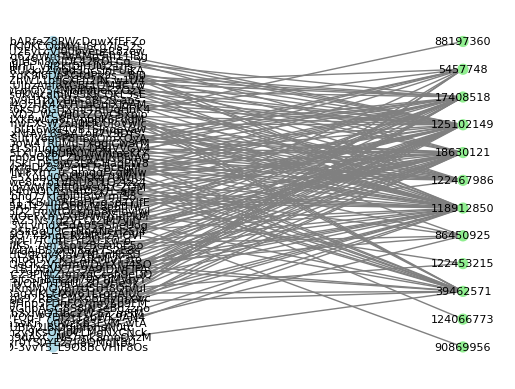

In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

# unique_uploader_nameが複数あるuser_idを抽出
user_id_counts = {}
for user_id, _ in data:
    user_id_counts[user_id] = user_id_counts.get(user_id, 0) + 1



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count == 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

# アップローダーごとのuser_idの数を集計
uploader_user_counts = {}
for user_id, uploader in filtered_data:
    if uploader not in uploader_user_counts:
        uploader_user_counts[uploader] = 1
    else:
        uploader_user_counts[uploader] += 1

# 結果の表示
print(uploader_user_counts)



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count > 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

user_ids = list(set([pair[0] for pair in filtered_data]))
uploaders = list(set([pair[1] for pair in filtered_data]))


# uploadersリストにuploader_user_countsを組み込む
uploaders_with_counts = []
for uploader in uploaders:
    if uploader in uploader_user_counts:
        count = uploader_user_counts[uploader]
        uploaders_with_counts.append((uploader, count))

# 結果の表示
print(uploaders_with_counts)

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(filtered_data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
        print(node)
    else:
        color_map.append('lightgreen')
        print(node)

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()


In [4]:
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_uploaders_with_counts = []
for uploader, count in uploaders_with_counts:
    # uploadersリスト内のアップローダーの数を取得
    uploaders_count = uploaders.count(uploader)
    # 掛け合わせた値を計算
    weighted_count = count * uploaders_count
    # 結果をリストに保存
    weighted_uploaders_with_counts.append((uploader, weighted_count))

# 結果の表示
for entry in weighted_uploaders_with_counts:
    print(f"uploader: {entry[0]}, weighted_count: {entry[1]}")

uploader: 90869956, weighted_count: 421
uploader: 124066773, weighted_count: 1
uploader: 39462571, weighted_count: 67
uploader: 122453215, weighted_count: 184
uploader: 86450925, weighted_count: 2
uploader: 118912850, weighted_count: 129
uploader: 122467986, weighted_count: 45
uploader: 18630121, weighted_count: 42
uploader: 125102149, weighted_count: 71
uploader: 17408518, weighted_count: 23
uploader: 5457748, weighted_count: 374
uploader: 88197360, weighted_count: 64


In [5]:
import pandas as pd

# グラフGから左ノードと右ノードのリストを取得
left_nodes = [node for node in G if node in user_ids]
right_nodes = [node for node in G if node in uploaders]

# 接続の有無を確認し、表に変換
connection_matrix = pd.DataFrame(index=left_nodes, columns=right_nodes)
for left_node in left_nodes:
    for right_node in right_nodes:
        if G.has_edge(left_node, right_node):
            connection_matrix.at[left_node, right_node] = 1
        else:
            connection_matrix.at[left_node, right_node] = 0

connection_matrix

90869956 124066773 39462571 122453215 86450925  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os        0         0        1         0        0   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU        0         0        0         0        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM        0         0        0         0        1   
YgvOZoNhzy9KsOYJ0CLMgNxCNck        0         0        0         0        0   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA        0         0        0         0        0   
...                              ...       ...      ...       ...      ...   
iQIgpNUBty2lBiDdjjJfbneN0tc        0         0        0         0        0   
434Vi4LSg62gWmTwAMp5ih11lBg        0         0        0         0        0   
NJkHoUgU2EyLcVJ00bveuzR8zew        0         0        0         0        0   
UndnVXrKl0KCOoMYLl6cg7ls52s        0         0        0         0        0   
p2--Wdt5z6ksD8GHXmtTmUqHhK4        0         0        0         0        0   

                            118912850 122467986 18630121 125102149 17408518  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os         1         0        0         0        0   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU         0         0        0         1        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM         1         0        1         0        0   
YgvOZoNhzy9KsOYJ0CLMgNxCNck         0         0        1         0        1   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA         1         0        1         0        1   
...                               ...       ...      ...       ...      ...   
iQIgpNUBty2lBiDdjjJfbneN0tc         0         0        0         1        1   
434Vi4LSg62gWmTwAMp5ih11lBg         0         0        1         0        1   
NJkHoUgU2EyLcVJ00bveuzR8zew         0         1        0         1        0   
UndnVXrKl0KCOoMYLl6cg7ls52s         1         0        0         1        0   
p2--Wdt5z6ksD8GHXmtTmUqHhK4         1         1        0         0        0   

                            5457748 88197360  
wgkHAHO-3vvY5_L9O8BcVHIF8Os       1        0  
aJ_J0VTyr0YS0YEz7Ji8QMqItBU       1        0  
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM       0        0  
YgvOZoNhzy9KsOYJ0CLMgNxCNck       0        0  
fGxP4Dxa5vKn_v0wzKb3EyM_wtA       0        0  
...                             ...      ...  
iQIgpNUBty2lBiDdjjJfbneN0tc       0        0  
434Vi4LSg62gWmTwAMp5ih11lBg       0        0  
NJkHoUgU2EyLcVJ00bveuzR8zew       0        0  
UndnVXrKl0KCOoMYLl6cg7ls52s       0        0  
p2--Wdt5z6ksD8GHXmtTmUqHhK4       0        0  

[64 rows x 12 columns]

In [24]:
print(connection_matrix)

                            90869956 124066773 39462571 122453215 86450925  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os        0         0        1         0        0   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU        0         0        0         0        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM        0         0        0         0        1   
YgvOZoNhzy9KsOYJ0CLMgNxCNck        0         0        0         0        0   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA        0         0        0         0        0   
...                              ...       ...      ...       ...      ...   
iQIgpNUBty2lBiDdjjJfbneN0tc        0         0        0         0        0   
434Vi4LSg62gWmTwAMp5ih11lBg        0         0        0         0        0   
NJkHoUgU2EyLcVJ00bveuzR8zew        0         0        0         0        0   
UndnVXrKl0KCOoMYLl6cg7ls52s        0         0        0         0        0   
p2--Wdt5z6ksD8GHXmtTmUqHhK4        0         0        0         0        0   

                            118912850 122467986 18630121 125102

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

def calculate_cosine_similarity(matrix):
    return pd.DataFrame(cosine_similarity(matrix), index=matrix.index, columns=matrix.index)

def calculate_tfidf_cosine_similarity(matrix):
    tfidf = TfidfTransformer()
    tfidf_matrix = tfidf.fit_transform(matrix)
    return pd.DataFrame(cosine_similarity(tfidf_matrix), index=matrix.index, columns=matrix.index)

In [7]:
cosine_sim_uploaders = calculate_cosine_similarity(connection_matrix.T)
print("uploadersのコサイン類似度:")
cosine_sim_uploaders

uploadersのコサイン類似度:


90869956  124066773  39462571  122453215  86450925  118912850  \
90869956   1.000000   0.000000  0.000000   0.000000  0.000000   0.171499   
124066773  0.000000   1.000000  0.242536   0.000000  0.408248   0.171499   
39462571   0.000000   0.242536  1.000000   0.171499  0.099015   0.291162   
122453215  0.000000   0.000000  0.171499   1.000000  0.000000   0.242536   
86450925   0.000000   0.408248  0.099015   0.000000  1.000000   0.140028   
118912850  0.171499   0.171499  0.291162   0.242536  0.140028   1.000000   
122467986  0.000000   0.277350  0.201802   0.000000  0.113228   0.332956   
18630121   0.192450   0.192450  0.326732   0.136083  0.392837   0.429064   
125102149  0.000000   0.174078  0.295540   0.000000  0.142134   0.477665   
17408518   0.204124   0.204124  0.247537   0.000000  0.416667   0.315063   
5457748    0.316228   0.000000  0.230089   0.000000  0.000000   0.271163   
88197360   0.000000   0.000000  0.242536   0.000000  0.000000   0.000000   

           122467986  18630121  125102149  17408518   5457748  88197360  
90869956    0.000000  0.192450   0.000000  0.204124  0.316228  0.000000  
124066773   0.277350  0.192450   0.174078  0.204124  0.000000  0.000000  
39462571    0.201802  0.326732   0.295540  0.247537  0.230089  0.242536  
122453215   0.000000  0.136083   0.000000  0.000000  0.000000  0.000000  
86450925    0.113228  0.392837   0.142134  0.416667  0.000000  0.000000  
118912850   0.332956  0.429064   0.477665  0.315063  0.271163  0.000000  
122467986   1.000000  0.266880   0.337963  0.283069  0.263117  0.000000  
18630121    0.266880  1.000000   0.335013  0.510688  0.060858  0.000000  
125102149   0.337963  0.335013   1.000000  0.390868  0.275241  0.000000  
17408518    0.283069  0.510688   0.390868  1.000000  0.193649  0.000000  
5457748     0.263117  0.060858   0.275241  0.193649  1.000000  0.000000  
88197360    0.000000  0.000000   0.000000  0.000000  0.000000  1.000000

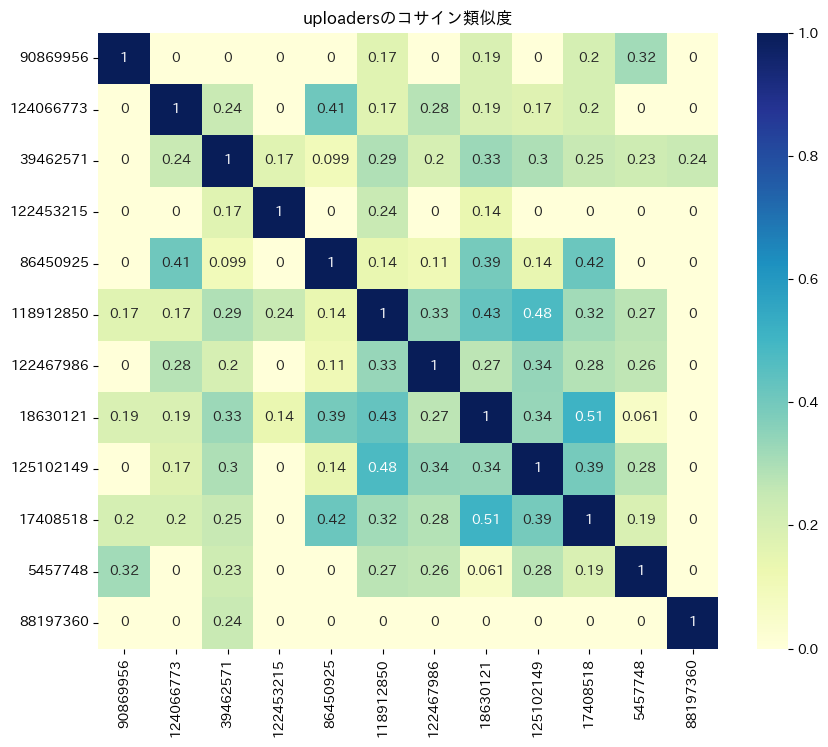

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのコサイン類似度")
plt.show()

In [9]:
tfidf_cosine_sim_uploaders = calculate_tfidf_cosine_similarity(connection_matrix.T)
print("uploadersのtf-idfコサイン類似度:")
tfidf_cosine_sim_uploaders

uploadersのtf-idfコサイン類似度:


90869956  124066773  39462571  122453215  86450925  118912850  \
90869956   1.000000   0.000000  0.000000   0.000000  0.000000   0.133386   
124066773  0.000000   1.000000  0.148758   0.000000  0.268145   0.102886   
39462571   0.000000   0.148758  1.000000   0.132140  0.039889   0.245240   
122453215  0.000000   0.000000  0.132140   1.000000  0.000000   0.236768   
86450925   0.000000   0.268145  0.039889   0.000000  1.000000   0.097589   
118912850  0.133386   0.102886  0.245240   0.236768  0.097589   1.000000   
122467986  0.000000   0.175320  0.128800   0.000000  0.047011   0.273580   
18630121   0.154009   0.118792  0.261819   0.105522  0.339439   0.374144   
125102149  0.000000   0.103813  0.247452   0.000000  0.084741   0.456952   
17408518   0.164420   0.126823  0.193082   0.000000  0.386677   0.252941   
5457748    0.255222   0.000000  0.243836   0.000000  0.000000   0.236731   
88197360   0.000000   0.000000  0.268246   0.000000  0.000000   0.000000   

           122467986  18630121  125102149  17408518   5457748  88197360  
90869956    0.000000  0.154009   0.000000  0.164420  0.255222  0.000000  
124066773   0.175320  0.118792   0.103813  0.126823  0.000000  0.000000  
39462571    0.128800  0.261819   0.247452  0.193082  0.243836  0.268246  
122453215   0.000000  0.105522   0.000000  0.000000  0.000000  0.000000  
86450925    0.047011  0.339439   0.084741  0.386677  0.000000  0.000000  
118912850   0.273580  0.374144   0.456952  0.252941  0.236731  0.000000  
122467986   1.000000  0.213150   0.285022  0.192631  0.233158  0.000000  
18630121    0.213150  1.000000   0.294207  0.453761  0.039306  0.000000  
125102149   0.285022  0.294207   1.000000  0.336224  0.256371  0.000000  
17408518    0.192631  0.453761   0.336224  1.000000  0.147276  0.000000  
5457748     0.233158  0.039306   0.256371  0.147276  1.000000  0.000000  
88197360    0.000000  0.000000   0.000000  0.000000  0.000000  1.000000

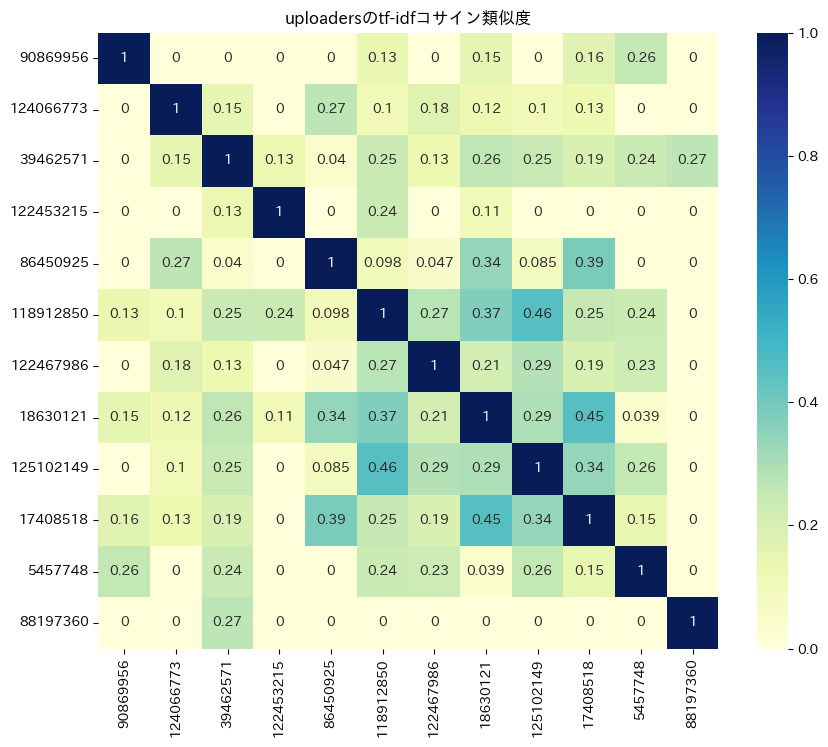

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのtf-idfコサイン類似度")
plt.show()

In [11]:
cosine_sim_users = calculate_cosine_similarity(connection_matrix)
print("user_idsのコサイン類似度:")
cosine_sim_users

user_idsのコサイン類似度:


wgkHAHO-3vvY5_L9O8BcVHIF8Os  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     1.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.408248   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.333333   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.333333   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             aJ_J0VTyr0YS0YEz7Ji8QMqItBU  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.408248   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     1.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.500000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.500000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.500000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fXkgtQQ8o9dAxC_Ne7mkSmpQxzM  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.333333   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     1.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.408248   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.666667   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.408248   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             YgvOZoNhzy9KsOYJ0CLMgNxCNck  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     1.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.816497   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.500000   
434Vi4LSg62gWmTwAMp5ih11lBg                     1.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.000000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fGxP4Dxa5vKn_v0wzKb3EyM_wtA  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.333333   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.666667   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.816497   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     1.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.408248   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.816497   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             Hsefx1Y9YQq-P7Df2t1abWK9AN4  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.666667   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.816497   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.333333   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.333333   
...                                                  ...   
iQIg

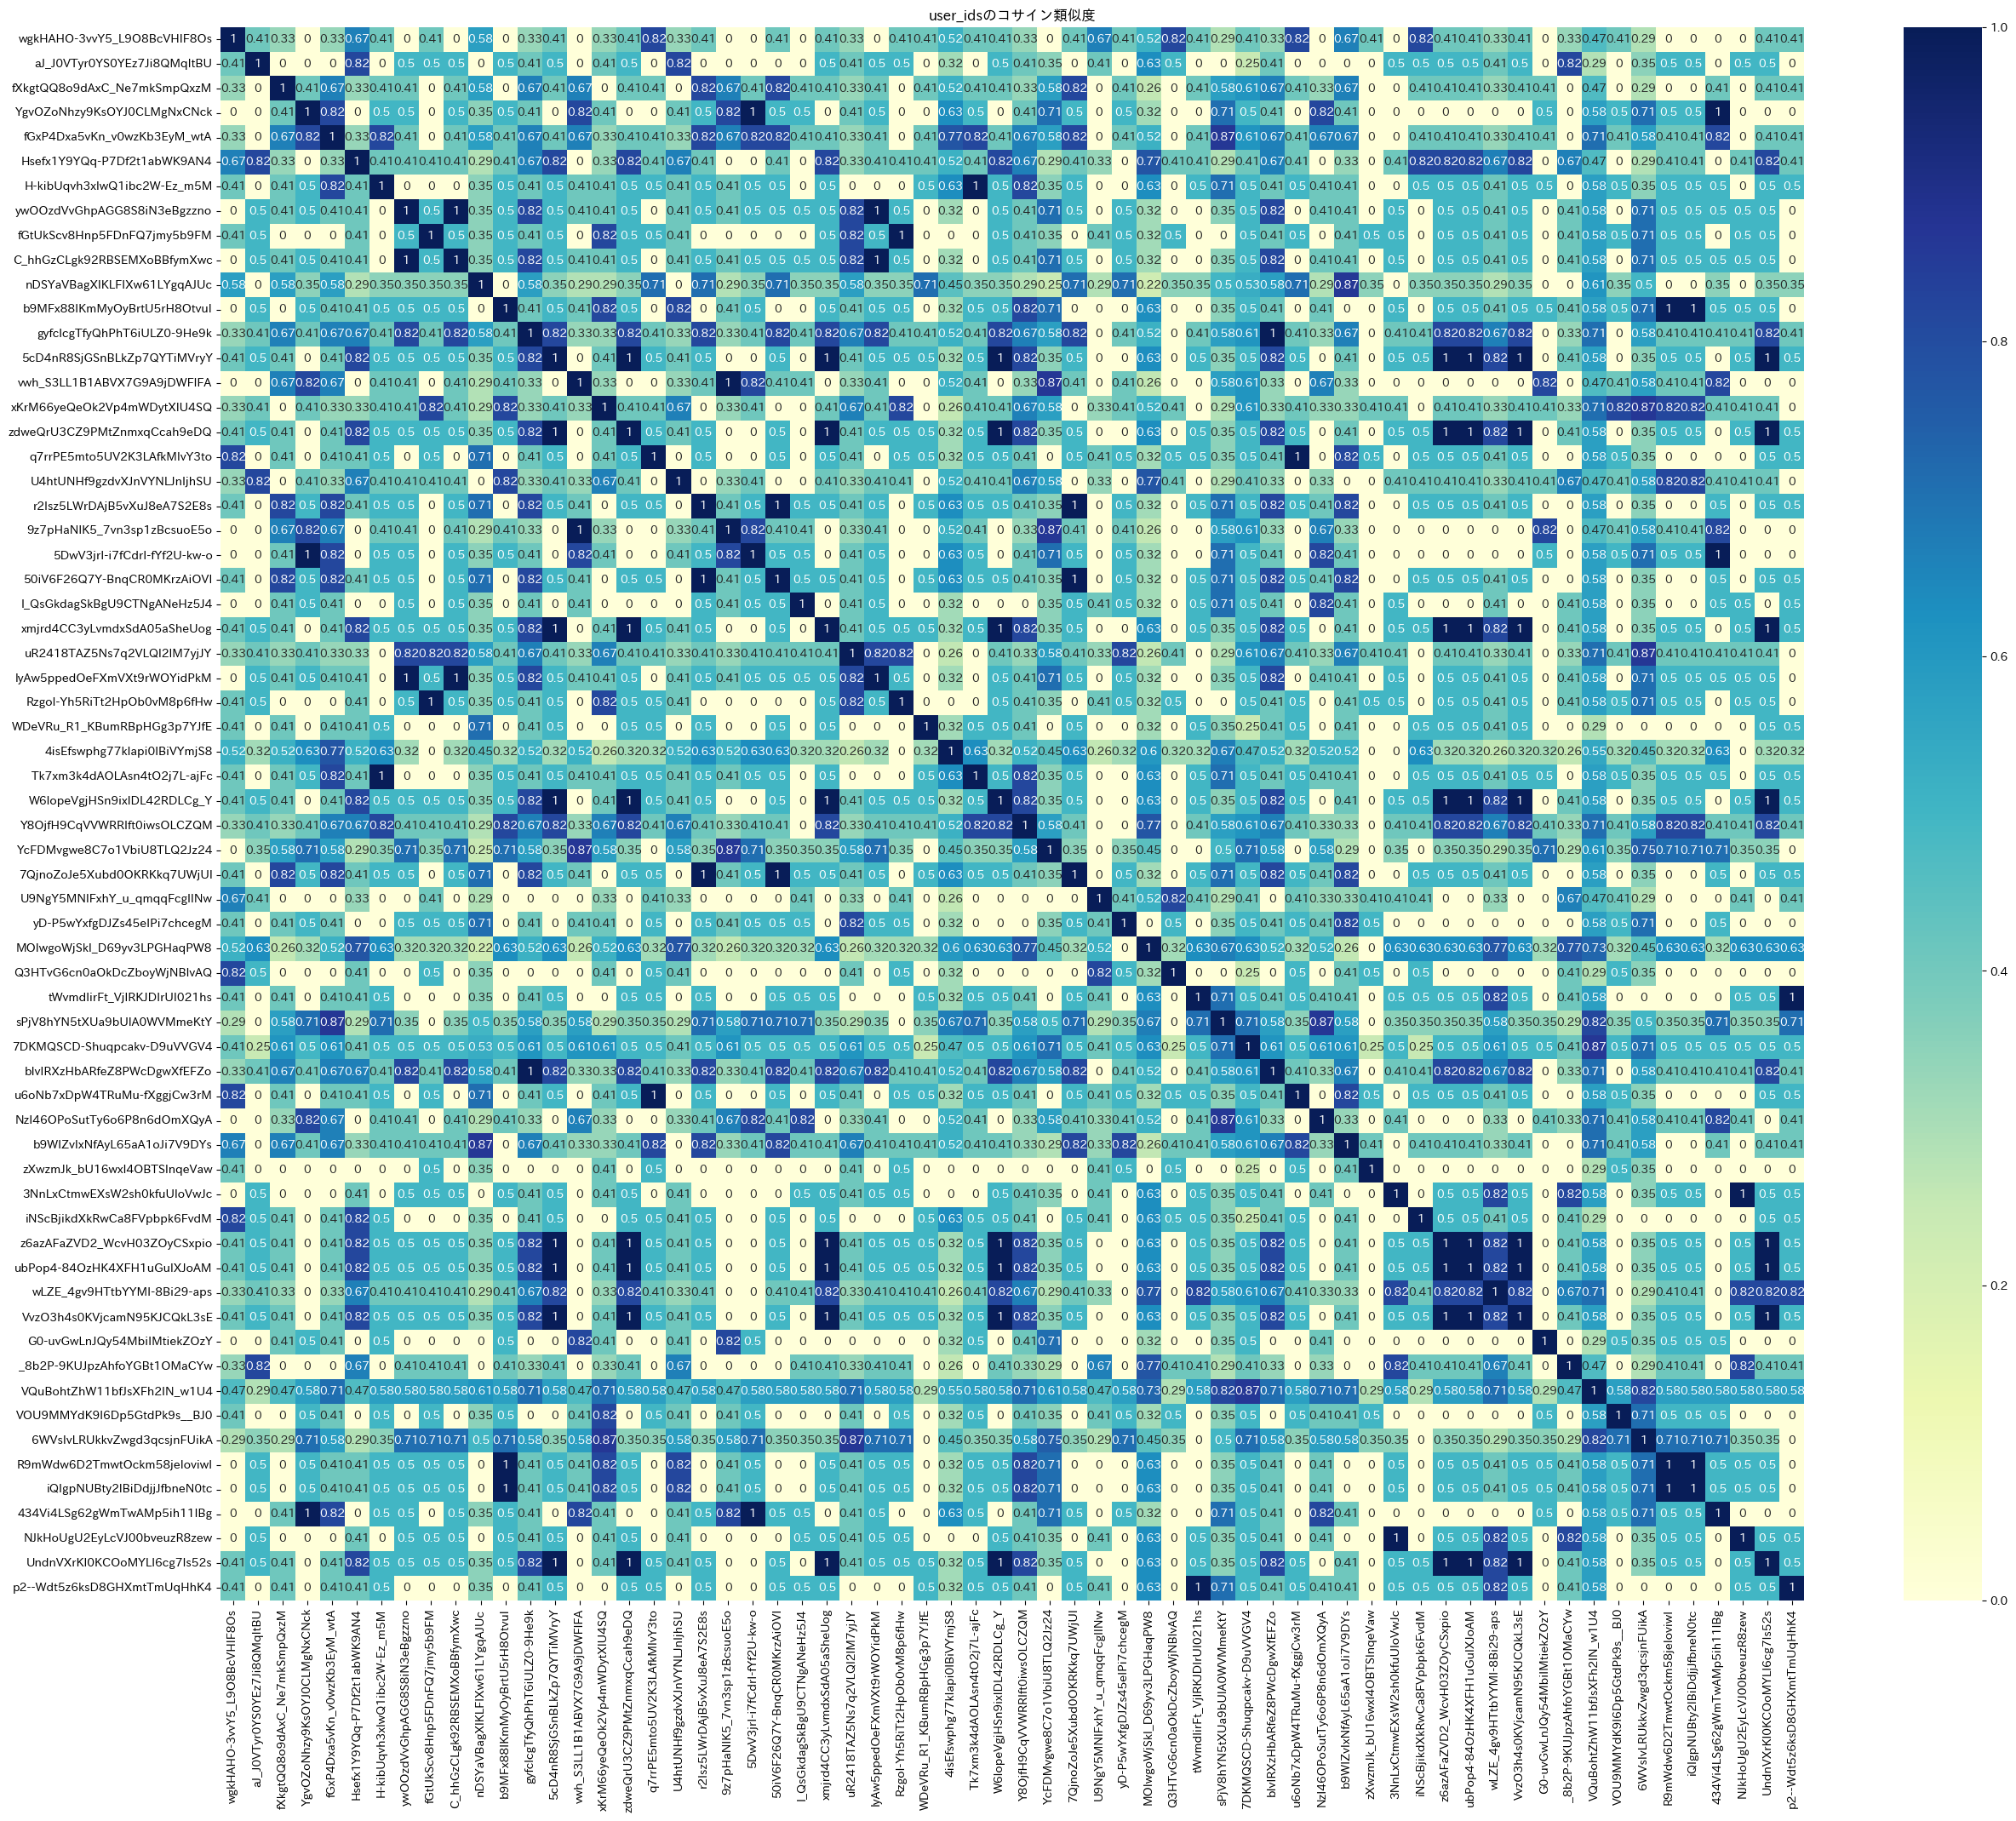

In [12]:
plt.figure(figsize=(30, 24))
sns.heatmap(cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのコサイン類似度")
plt.show()

In [13]:
tfidf_cosine_sim_users = calculate_tfidf_cosine_similarity(connection_matrix)
print("user_idsのtf-idfコサイン類似度:")
tfidf_cosine_sim_users

user_idsのtf-idfコサイン類似度:


wgkHAHO-3vvY5_L9O8BcVHIF8Os  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     1.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.605529   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.163971   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.211943   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.287761   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.220998   

                             aJ_J0VTyr0YS0YEz7Ji8QMqItBU  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.605529   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     1.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.328930   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.278181   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.364110   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fXkgtQQ8o9dAxC_Ne7mkSmpQxzM  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.163971   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     1.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.311561   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.472968   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.311561   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.279853   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.214924   

                             YgvOZoNhzy9KsOYJ0CLMgNxCNck  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.311561   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     1.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.856493   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.556587   
434Vi4LSg62gWmTwAMp5ih11lBg                     1.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.000000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fGxP4Dxa5vKn_v0wzKb3EyM_wtA  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.211943   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.472968   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.856493   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     1.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.476713   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.856493   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.361727   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.277802   

                             Hsefx1Y9YQq-P7Df2t1abWK9AN4  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.725345   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.893911   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.178998   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.231365   
...                                                  ...   
iQIg

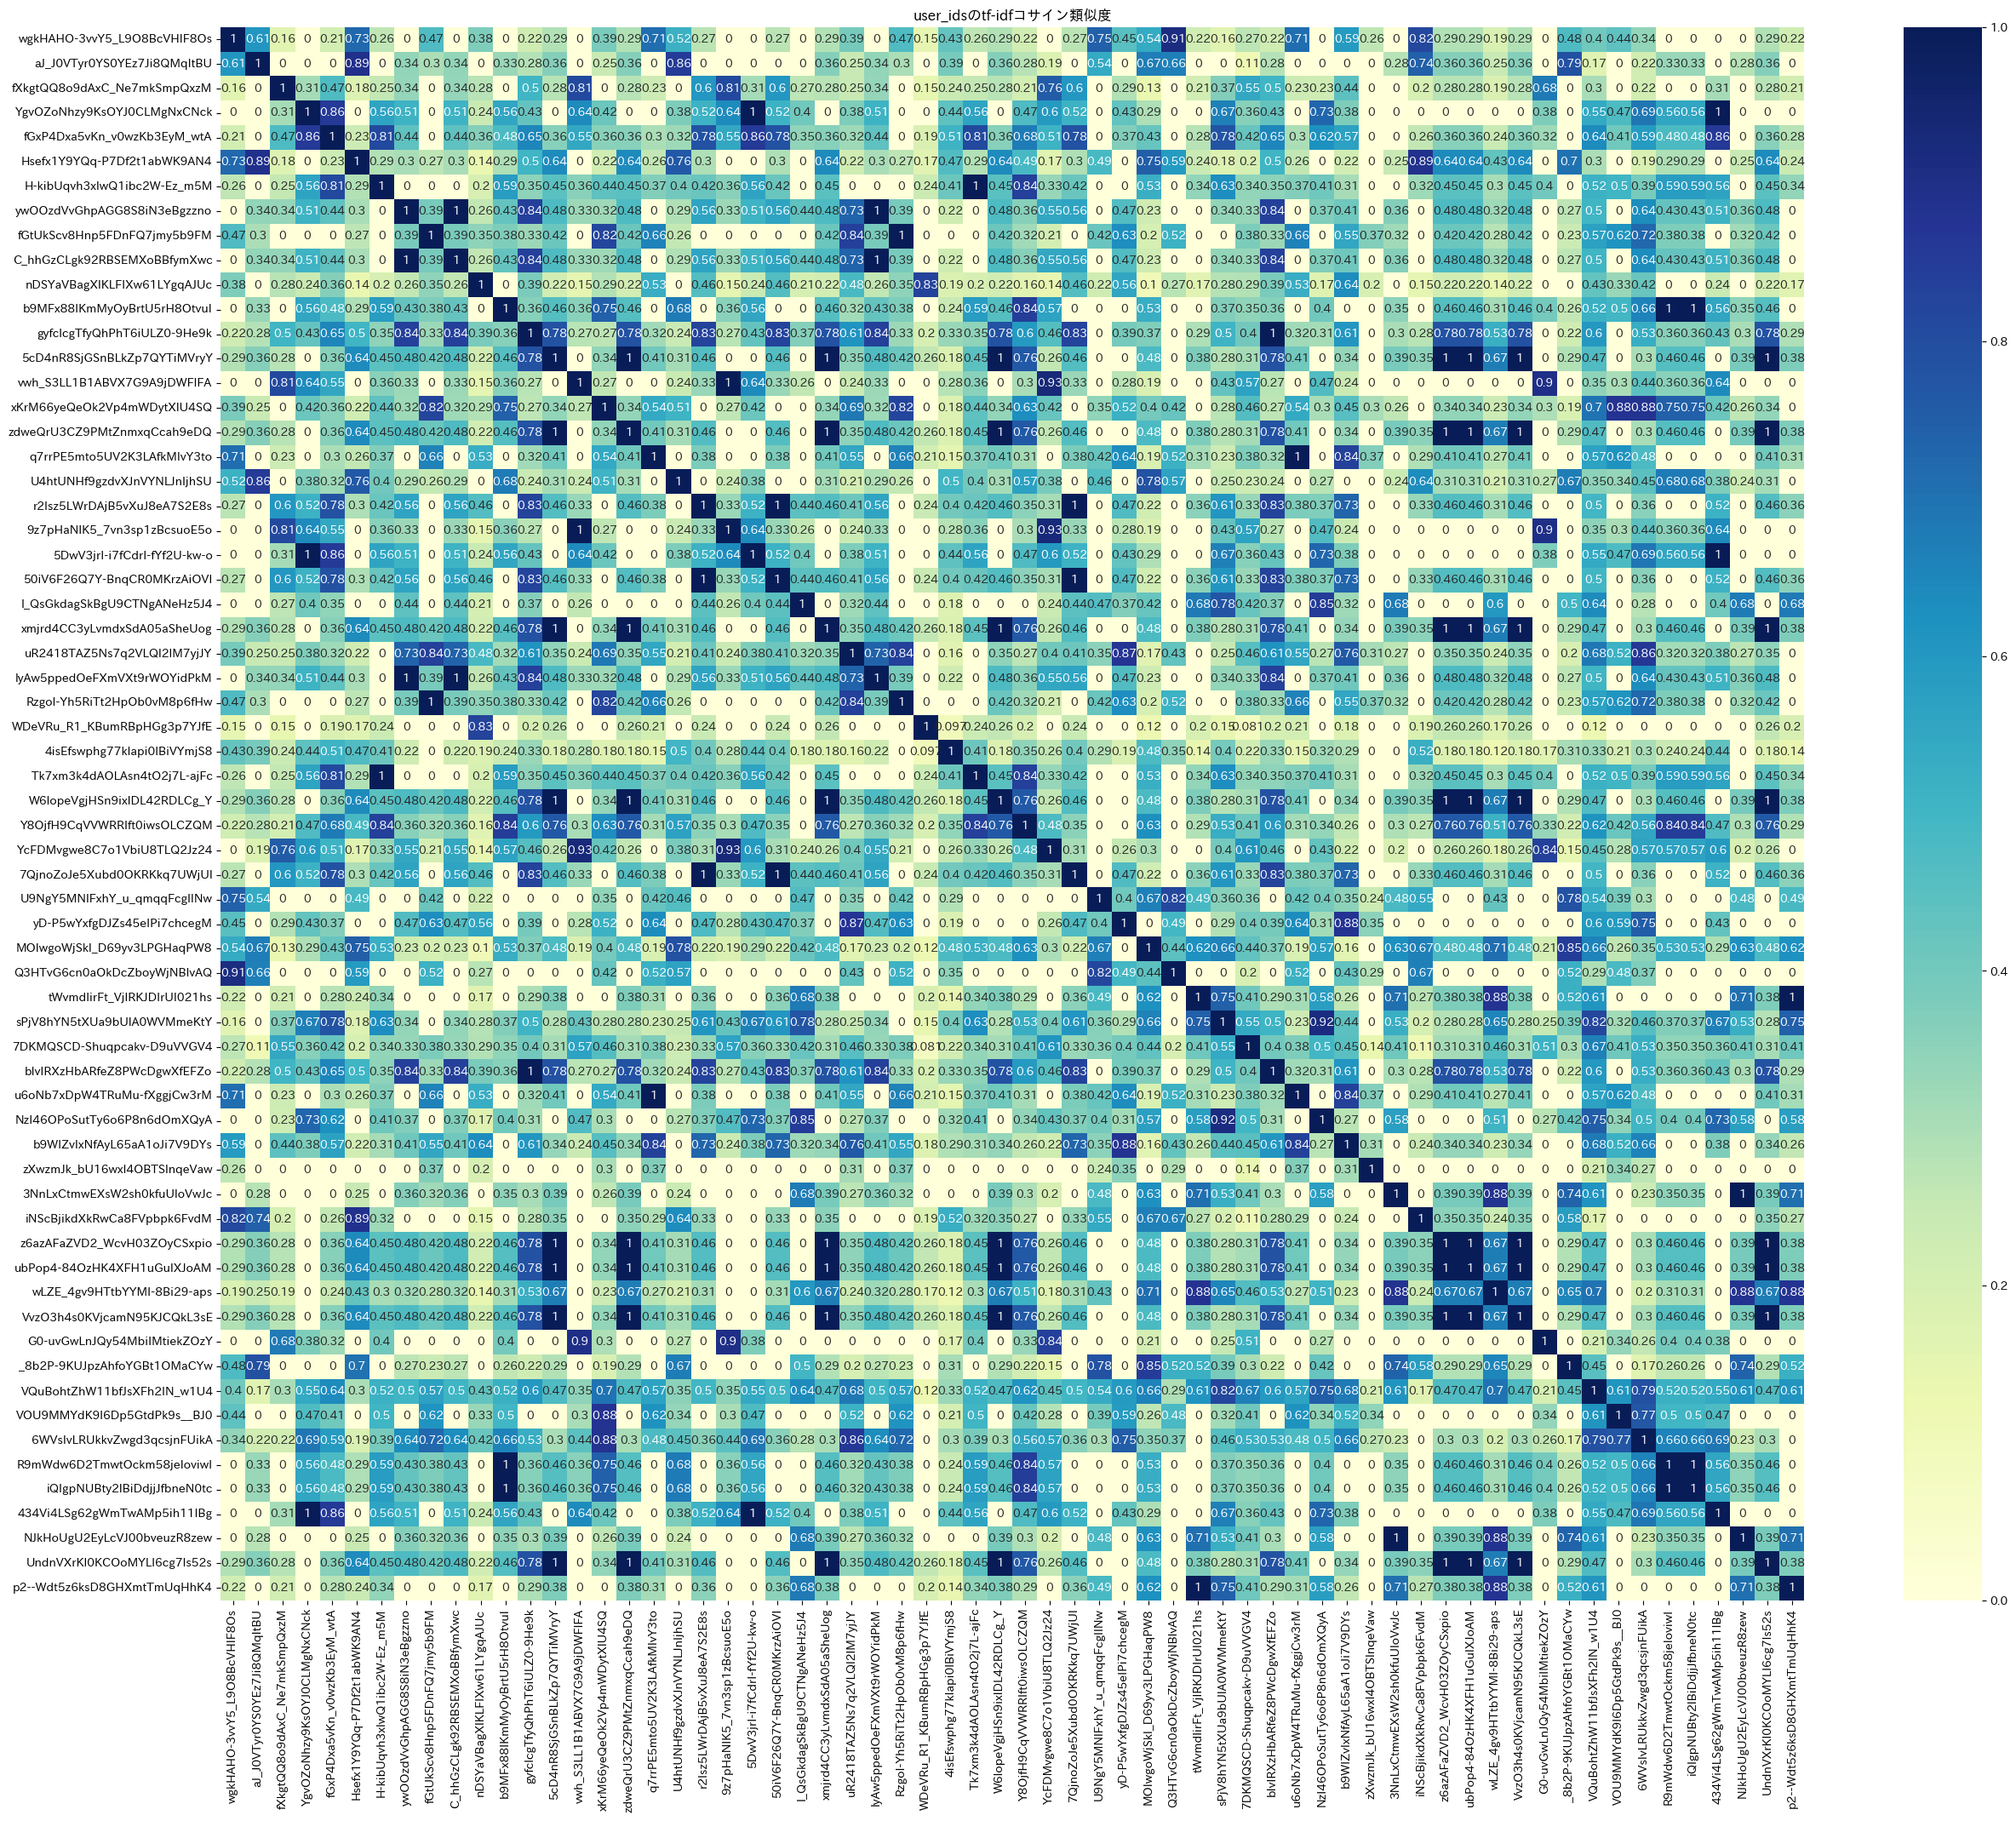

In [14]:
plt.figure(figsize=(30, 24))
sns.heatmap(tfidf_cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのtf-idfコサイン類似度")
plt.show()

In [26]:
# 重み付けを施すためのコード
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_connection_matrix = connection_matrix.copy()
for uploader, count in uploaders_with_counts:
    uploaders_count = uploaders.count(uploader)
    weighted_count = count * uploaders_count
    # 重み付けを施す
    for left_node in left_nodes:
        for right_node in right_nodes:
            if G.has_edge(left_node, right_node) and right_node == uploader:
                weighted_connection_matrix.at[left_node, right_node] *= weighted_count

# 重み付けを施した表の表示
weighted_connection_matrix

90869956 124066773 39462571 122453215 86450925  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os        0         0       67         0        0   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU        0         0        0         0        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM        0         0        0         0        2   
YgvOZoNhzy9KsOYJ0CLMgNxCNck        0         0        0         0        0   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA        0         0        0         0        0   
...                              ...       ...      ...       ...      ...   
iQIgpNUBty2lBiDdjjJfbneN0tc        0         0        0         0        0   
434Vi4LSg62gWmTwAMp5ih11lBg        0         0        0         0        0   
NJkHoUgU2EyLcVJ00bveuzR8zew        0         0        0         0        0   
UndnVXrKl0KCOoMYLl6cg7ls52s        0         0        0         0        0   
p2--Wdt5z6ksD8GHXmtTmUqHhK4        0         0        0         0        0   

                            118912850 122467986 18630121 125102149 17408518  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os       129         0        0         0        0   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU         0         0        0        71        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM       129         0       42         0        0   
YgvOZoNhzy9KsOYJ0CLMgNxCNck         0         0       42         0       23   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA       129         0       42         0       23   
...                               ...       ...      ...       ...      ...   
iQIgpNUBty2lBiDdjjJfbneN0tc         0         0        0        71       23   
434Vi4LSg62gWmTwAMp5ih11lBg         0         0       42         0       23   
NJkHoUgU2EyLcVJ00bveuzR8zew         0        45        0        71        0   
UndnVXrKl0KCOoMYLl6cg7ls52s       129         0        0        71        0   
p2--Wdt5z6ksD8GHXmtTmUqHhK4       129        45        0         0        0   

                            5457748 88197360  
wgkHAHO-3vvY5_L9O8BcVHIF8Os     374        0  
aJ_J0VTyr0YS0YEz7Ji8QMqItBU     374        0  
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM       0        0  
YgvOZoNhzy9KsOYJ0CLMgNxCNck       0        0  
fGxP4Dxa5vKn_v0wzKb3EyM_wtA       0        0  
...                             ...      ...  
iQIgpNUBty2lBiDdjjJfbneN0tc       0        0  
434Vi4LSg62gWmTwAMp5ih11lBg       0        0  
NJkHoUgU2EyLcVJ00bveuzR8zew       0        0  
UndnVXrKl0KCOoMYLl6cg7ls52s       0        0  
p2--Wdt5z6ksD8GHXmtTmUqHhK4       0        0  

[64 rows x 12 columns]

In [25]:
#csv二保存
weighted_connection_matrix.to_csv('/work/weighted_connection_matrix.csv')

In [16]:
cosine_sim_uploaders = calculate_cosine_similarity(connection_matrix.T)
print("uploadersのコサイン類似度:")
cosine_sim_uploaders

uploadersのコサイン類似度:


90869956  124066773  39462571  122453215  86450925  118912850  \
90869956   1.000000   0.000000  0.000000   0.000000  0.000000   0.171499   
124066773  0.000000   1.000000  0.242536   0.000000  0.408248   0.171499   
39462571   0.000000   0.242536  1.000000   0.171499  0.099015   0.291162   
122453215  0.000000   0.000000  0.171499   1.000000  0.000000   0.242536   
86450925   0.000000   0.408248  0.099015   0.000000  1.000000   0.140028   
118912850  0.171499   0.171499  0.291162   0.242536  0.140028   1.000000   
122467986  0.000000   0.277350  0.201802   0.000000  0.113228   0.332956   
18630121   0.192450   0.192450  0.326732   0.136083  0.392837   0.429064   
125102149  0.000000   0.174078  0.295540   0.000000  0.142134   0.477665   
17408518   0.204124   0.204124  0.247537   0.000000  0.416667   0.315063   
5457748    0.316228   0.000000  0.230089   0.000000  0.000000   0.271163   
88197360   0.000000   0.000000  0.242536   0.000000  0.000000   0.000000   

           122467986  18630121  125102149  17408518   5457748  88197360  
90869956    0.000000  0.192450   0.000000  0.204124  0.316228  0.000000  
124066773   0.277350  0.192450   0.174078  0.204124  0.000000  0.000000  
39462571    0.201802  0.326732   0.295540  0.247537  0.230089  0.242536  
122453215   0.000000  0.136083   0.000000  0.000000  0.000000  0.000000  
86450925    0.113228  0.392837   0.142134  0.416667  0.000000  0.000000  
118912850   0.332956  0.429064   0.477665  0.315063  0.271163  0.000000  
122467986   1.000000  0.266880   0.337963  0.283069  0.263117  0.000000  
18630121    0.266880  1.000000   0.335013  0.510688  0.060858  0.000000  
125102149   0.337963  0.335013   1.000000  0.390868  0.275241  0.000000  
17408518    0.283069  0.510688   0.390868  1.000000  0.193649  0.000000  
5457748     0.263117  0.060858   0.275241  0.193649  1.000000  0.000000  
88197360    0.000000  0.000000   0.000000  0.000000  0.000000  1.000000

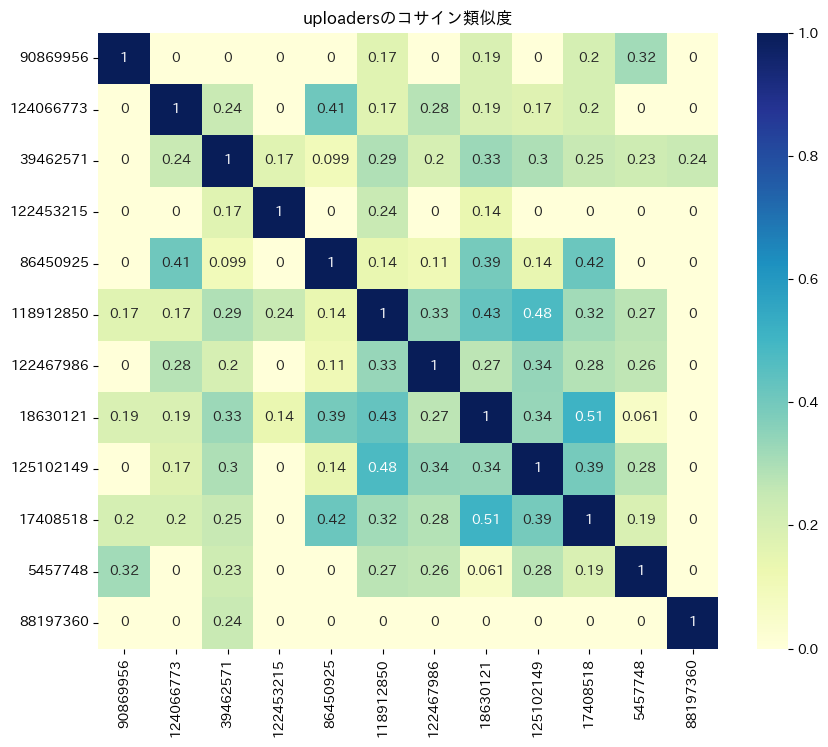

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのコサイン類似度")
plt.show()

In [18]:
tfidf_cosine_sim_uploaders = calculate_tfidf_cosine_similarity(connection_matrix.T)
print("uploadersのtf-idfコサイン類似度:")
tfidf_cosine_sim_uploaders

uploadersのtf-idfコサイン類似度:


90869956  124066773  39462571  122453215  86450925  118912850  \
90869956   1.000000   0.000000  0.000000   0.000000  0.000000   0.133386   
124066773  0.000000   1.000000  0.148758   0.000000  0.268145   0.102886   
39462571   0.000000   0.148758  1.000000   0.132140  0.039889   0.245240   
122453215  0.000000   0.000000  0.132140   1.000000  0.000000   0.236768   
86450925   0.000000   0.268145  0.039889   0.000000  1.000000   0.097589   
118912850  0.133386   0.102886  0.245240   0.236768  0.097589   1.000000   
122467986  0.000000   0.175320  0.128800   0.000000  0.047011   0.273580   
18630121   0.154009   0.118792  0.261819   0.105522  0.339439   0.374144   
125102149  0.000000   0.103813  0.247452   0.000000  0.084741   0.456952   
17408518   0.164420   0.126823  0.193082   0.000000  0.386677   0.252941   
5457748    0.255222   0.000000  0.243836   0.000000  0.000000   0.236731   
88197360   0.000000   0.000000  0.268246   0.000000  0.000000   0.000000   

           122467986  18630121  125102149  17408518   5457748  88197360  
90869956    0.000000  0.154009   0.000000  0.164420  0.255222  0.000000  
124066773   0.175320  0.118792   0.103813  0.126823  0.000000  0.000000  
39462571    0.128800  0.261819   0.247452  0.193082  0.243836  0.268246  
122453215   0.000000  0.105522   0.000000  0.000000  0.000000  0.000000  
86450925    0.047011  0.339439   0.084741  0.386677  0.000000  0.000000  
118912850   0.273580  0.374144   0.456952  0.252941  0.236731  0.000000  
122467986   1.000000  0.213150   0.285022  0.192631  0.233158  0.000000  
18630121    0.213150  1.000000   0.294207  0.453761  0.039306  0.000000  
125102149   0.285022  0.294207   1.000000  0.336224  0.256371  0.000000  
17408518    0.192631  0.453761   0.336224  1.000000  0.147276  0.000000  
5457748     0.233158  0.039306   0.256371  0.147276  1.000000  0.000000  
88197360    0.000000  0.000000   0.000000  0.000000  0.000000  1.000000

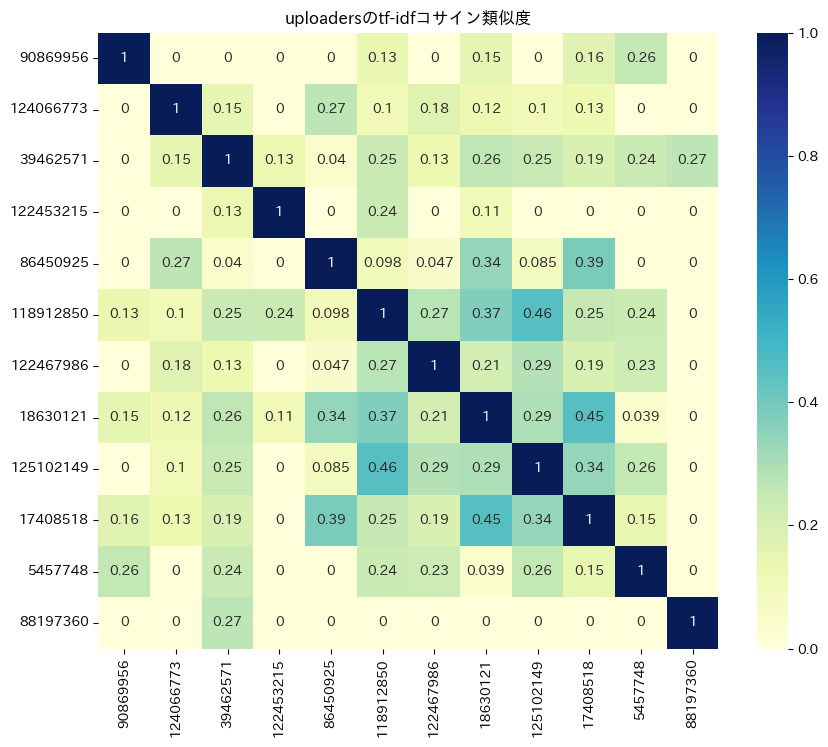

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのtf-idfコサイン類似度")
plt.show()

In [20]:
cosine_sim_users = calculate_cosine_similarity(connection_matrix)
print("user_idsのコサイン類似度:")
cosine_sim_users

user_idsのコサイン類似度:


wgkHAHO-3vvY5_L9O8BcVHIF8Os  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     1.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.408248   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.333333   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.333333   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             aJ_J0VTyr0YS0YEz7Ji8QMqItBU  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.408248   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     1.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.500000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.500000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.500000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fXkgtQQ8o9dAxC_Ne7mkSmpQxzM  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.333333   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     1.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.408248   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.666667   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.408248   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             YgvOZoNhzy9KsOYJ0CLMgNxCNck  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     1.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.816497   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.500000   
434Vi4LSg62gWmTwAMp5ih11lBg                     1.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.000000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fGxP4Dxa5vKn_v0wzKb3EyM_wtA  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.333333   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.666667   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.816497   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     1.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.408248   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.816497   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.408248   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.408248   

                             Hsefx1Y9YQq-P7Df2t1abWK9AN4  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.666667   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.816497   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.333333   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.333333   
...                                                  ...   
iQIg

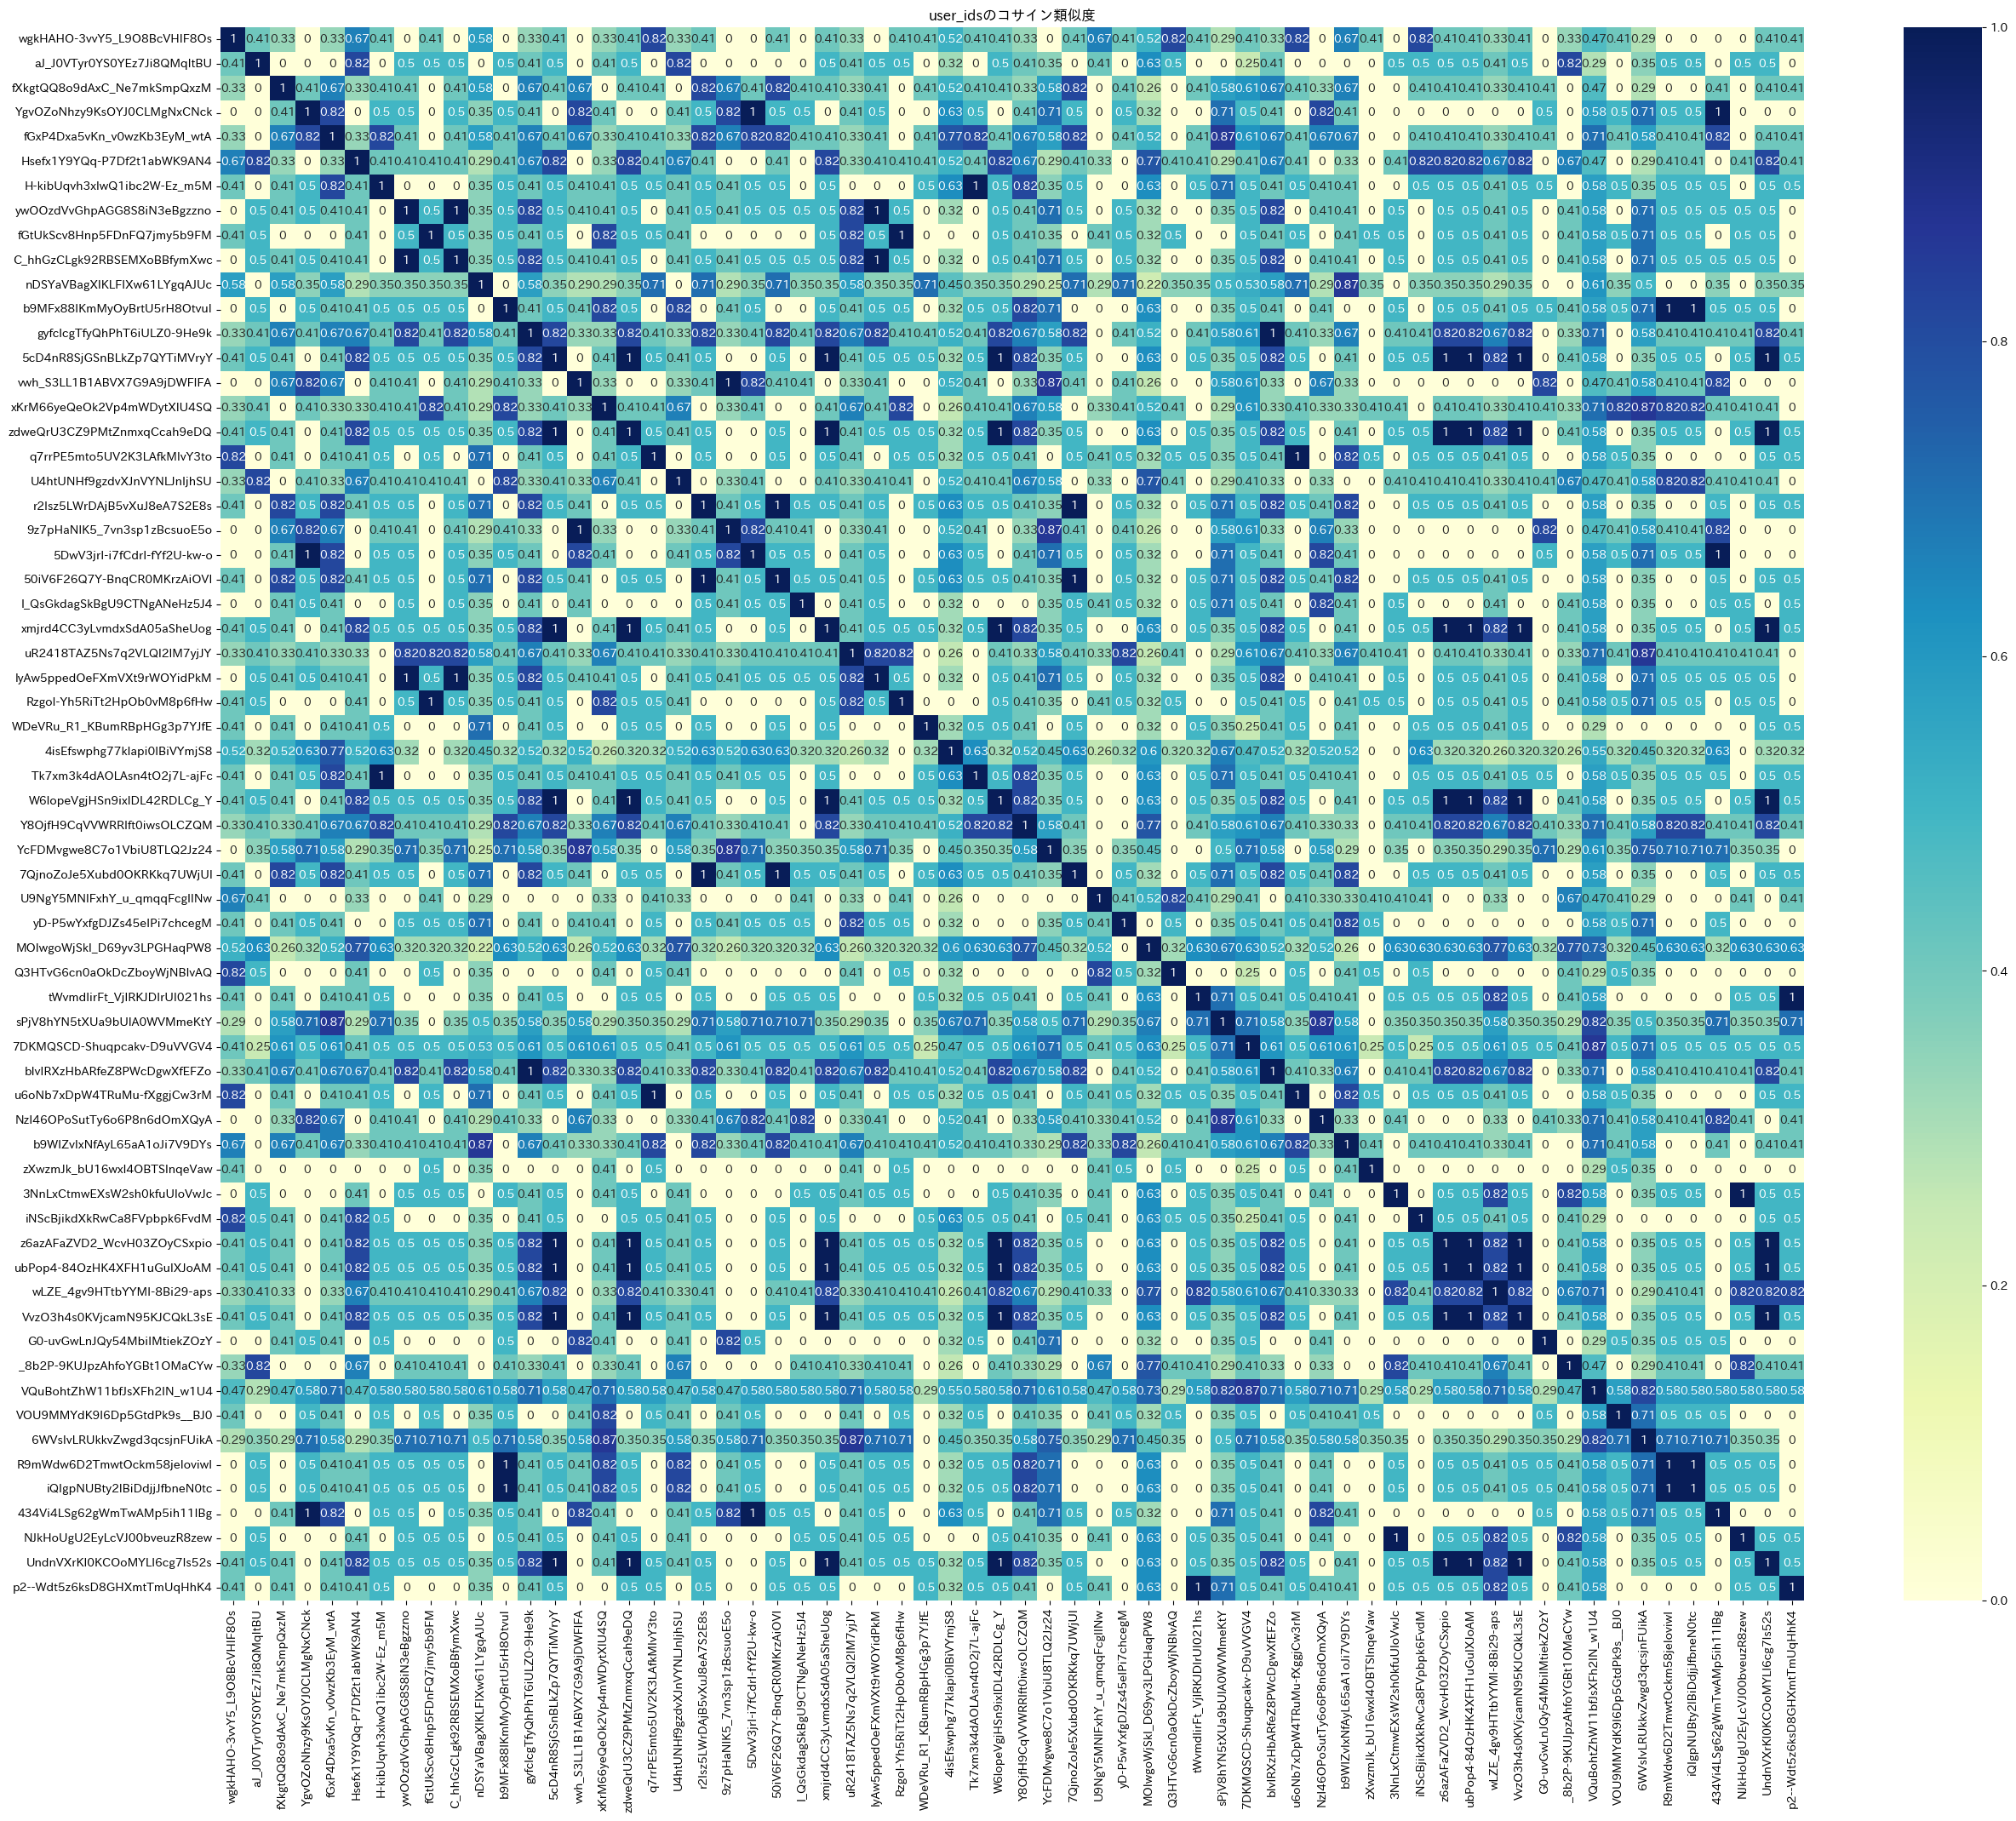

In [21]:
plt.figure(figsize=(30, 24))
sns.heatmap(cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのコサイン類似度")
plt.show()

In [33]:
tfidf_cosine_sim_users = calculate_tfidf_cosine_similarity(connection_matrix)
print("user_idsのtf-idfコサイン類似度:")
tfidf_cosine_sim_users

user_idsのtf-idfコサイン類似度:


wgkHAHO-3vvY5_L9O8BcVHIF8Os  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     1.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.605529   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.163971   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.211943   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.287761   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.220998   

                             aJ_J0VTyr0YS0YEz7Ji8QMqItBU  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.605529   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     1.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.328930   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.278181   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.364110   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fXkgtQQ8o9dAxC_Ne7mkSmpQxzM  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.163971   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     1.000000   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.311561   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.472968   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.000000   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.311561   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.279853   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.214924   

                             YgvOZoNhzy9KsOYJ0CLMgNxCNck  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.000000   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.311561   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     1.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.856493   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.556587   
434Vi4LSg62gWmTwAMp5ih11lBg                     1.000000   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.000000   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.000000   

                             fGxP4Dxa5vKn_v0wzKb3EyM_wtA  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.211943   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.472968   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.856493   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     1.000000   
...                                                  ...   
iQIgpNUBty2lBiDdjjJfbneN0tc                     0.476713   
434Vi4LSg62gWmTwAMp5ih11lBg                     0.856493   
NJkHoUgU2EyLcVJ00bveuzR8zew                     0.000000   
UndnVXrKl0KCOoMYLl6cg7ls52s                     0.361727   
p2--Wdt5z6ksD8GHXmtTmUqHhK4                     0.277802   

                             Hsefx1Y9YQq-P7Df2t1abWK9AN4  \
wgkHAHO-3vvY5_L9O8BcVHIF8Os                     0.725345   
aJ_J0VTyr0YS0YEz7Ji8QMqItBU                     0.893911   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.178998   
YgvOZoNhzy9KsOYJ0CLMgNxCNck                     0.000000   
fGxP4Dxa5vKn_v0wzKb3EyM_wtA                     0.231365   
...                                                  ...   
iQIg

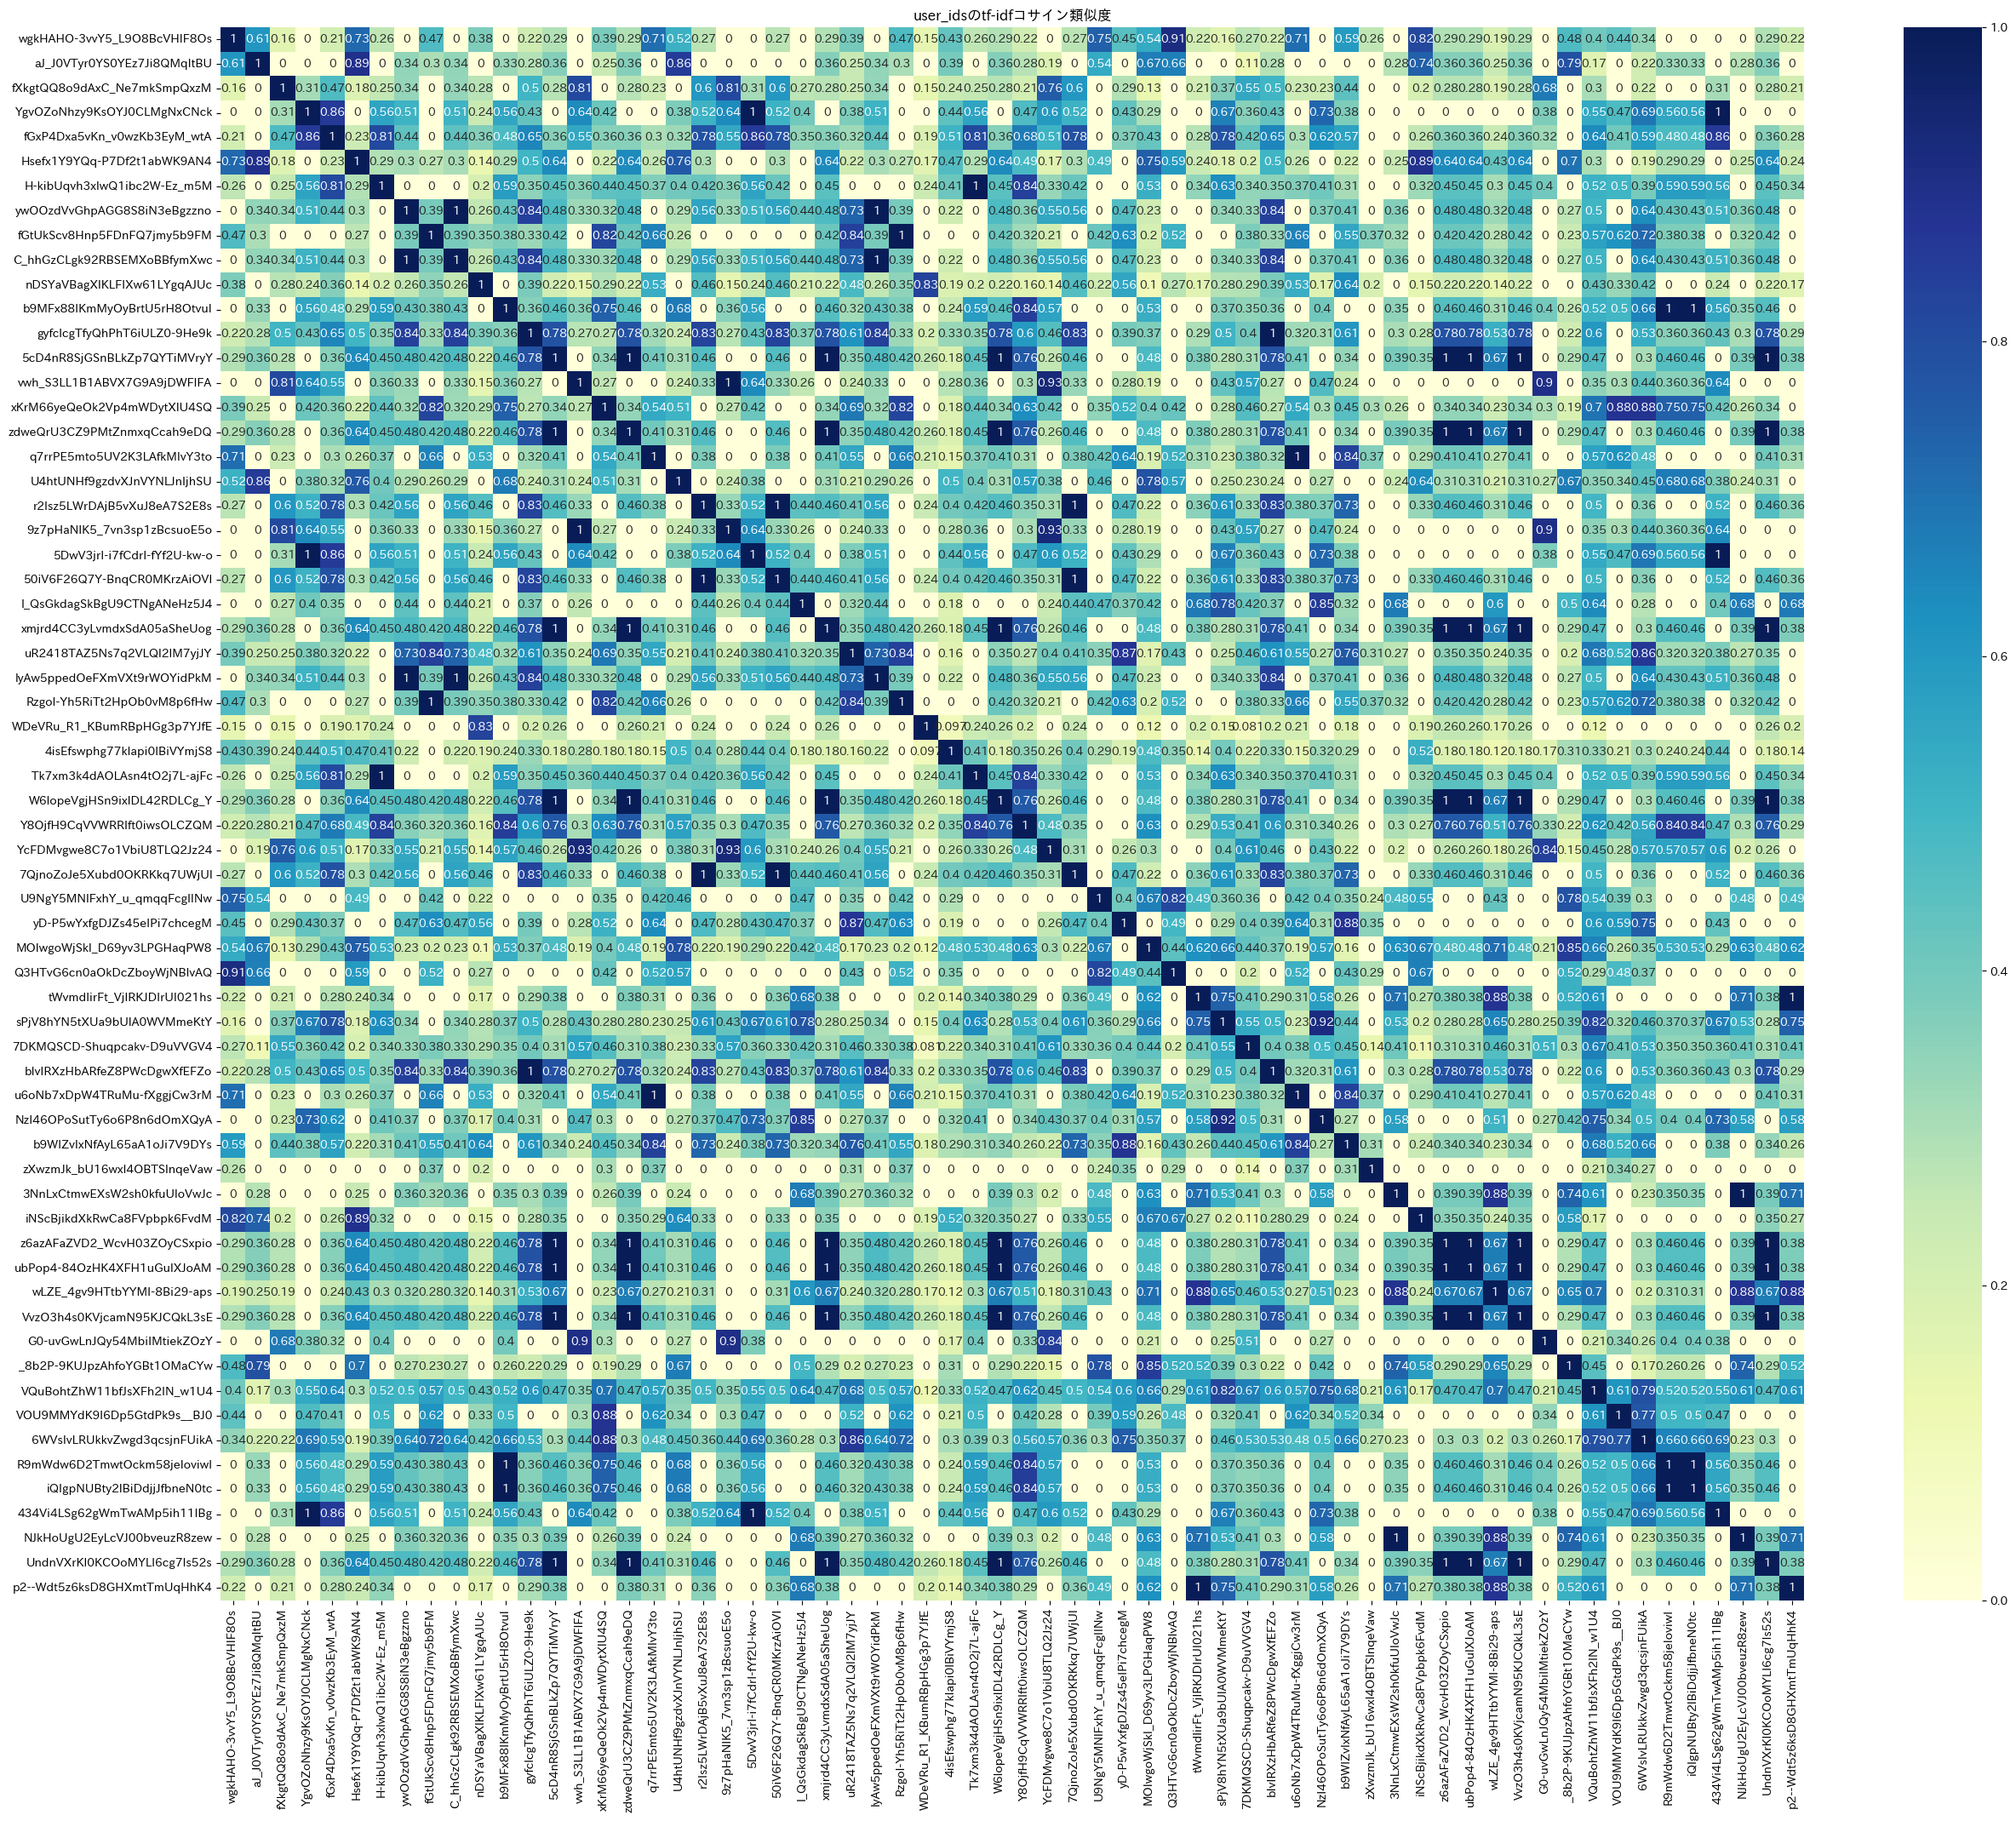

In [34]:
plt.figure(figsize=(30, 24))
sns.heatmap(tfidf_cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのtf-idfコサイン類似度")
plt.show()

In [27]:
from scipy.cluster.hierarchy import linkage

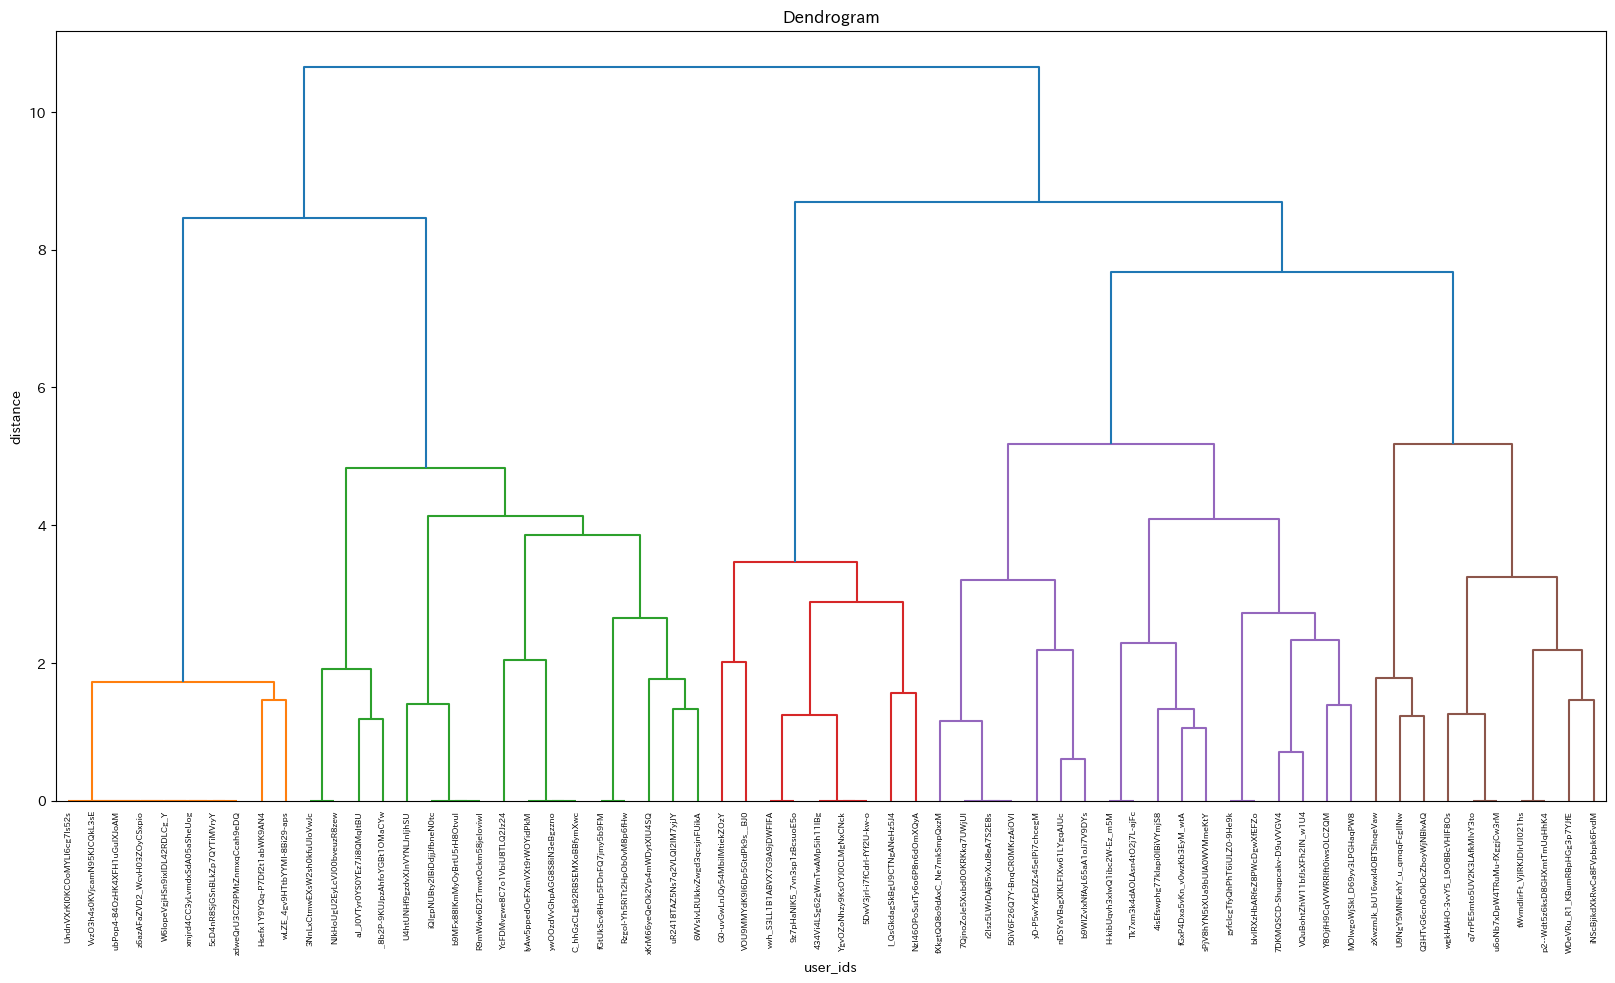

In [45]:
from scipy.cluster.hierarchy import dendrogram

# user_ids間の階層的クラスタリング
# コサイン類似度を計算
cosine_sim_users = calculate_cosine_similarity(connection_matrix)

# 階層的クラスタリング
Z = linkage(cosine_sim_users, method='ward')

#デンドログラムの描画
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.xlabel('user_ids')
plt.ylabel('distance')
dendrogram(Z, labels=cosine_sim_users.index, leaf_rotation=90)
plt.show()


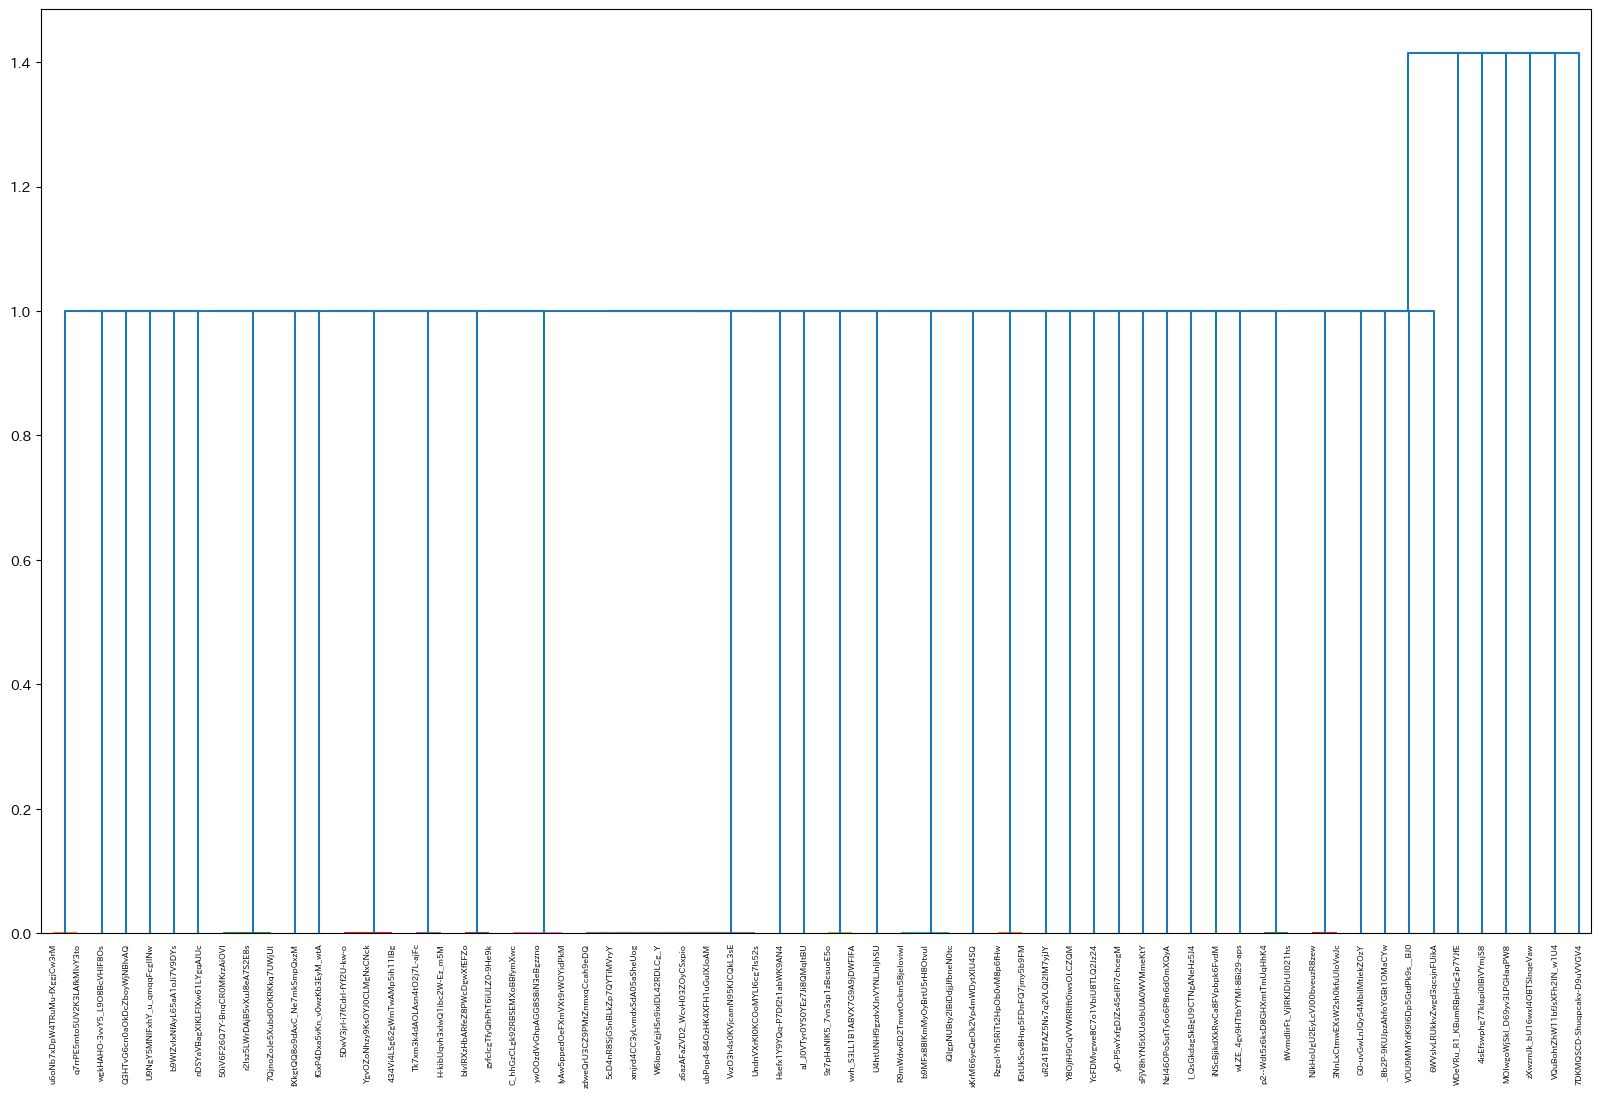

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 階層的クラスタリングの実行
linked = linkage(connection_matrix, 'single')

# デンドログラムの描画
plt.figure(figsize=(20, 12))
dendrogram(linked,
            orientation='top',
            labels=connection_matrix.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()